# Análisis de Recursos

Este notebook analiza la distribución de recursos por provincia, evaluando métricas como disponibilidad por 100 km² y por cada 1.000 habitantes. El objetivo es identificar desigualdades y sugerir recomendaciones.

## Visualización de Datos
Generamos gráficos para explorar la distribución de los recursos.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os

directory_path = r"C:\Users\kthfu\DS_Work\Mi-primer-EDA"
print("Dateien im Verzeichnis:", os.listdir(directory_path))


Dateien im Verzeichnis: ['0-Proyecto_EDA.ipynb', '1-Guia-EDA.ipynb', 'csv.poblacion.csv', 'EDA_resourcen.ipynb', 'Emerg_json_rel_daten.csv', 'Emerg_Resource.csv', 'entpackt', 'entwicklung_ressourcen_über_Jahre_logaritmisch.png', 'final_data_corrected.csv', 'log_resourcen_nach_provinz.png', 'markdown.beschreibung_EDA.md', 'merged_data.csv', 'merge_poblacion_ressourcen_final.csv', 'Neues_EDA_Projekt.ipynb', 'Project_Break_I__EDA', 'resourcenentwicklung_nach_jahren.png', 'resourcen_nach_provinz.png', 'ressourcenverteilung.neu.png', 'ressourcenverteilung.png', 'ressourcen_nach_jahr_exp.png', 'ressourcen_nach_provinz_log.png', 'Risorse per le cure di emergenza.zip', 'Robert-Koch-Institut', 'ume_einheiten_nach_provinz.png', 'UrfassungNotebook.ipynb', 'usvb_einheiten_nach_provinz.png', 'usvb_einheiten_nach_provinz_2.png']


In [4]:
import zipfile

zip_file = "Risorse per le cure di emergenza.zip"  # Ersetze durch den tatsächlichen Dateinamen
extract_path = "entpackt"

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("Entpackte Dateien:", os.listdir(extract_path))




Entpackte Dateien: ['datos.gob.es', 'file_report.csv']


In [5]:
import os

datos_folder = os.path.join(extract_path, "datos.gob.es")
print("Inhalt von 'datos.gob.es':", os.listdir(datos_folder))



Inhalt von 'datos.gob.es': ['Emergency Emergency Care Resources-3.json', 'Resurse de urgență-1.xls', 'Risorse per le cure di emergenza-2.csv']


## Carga de Datos
Cargamos los datos necesarios para el análisis.

In [6]:


csv_file = os.path.join(extract_path, "file_report.csv")
data = pd.read_csv(csv_file, encoding="utf-8") 

print(data.head())

print(data.info())


                             filename     status    issue_cause downloadURL  \
0    Risorse per le cure di emergenza  delivered  no download url available   
1  Emergency Emergency Care Resources  delivered  no download url available   
2                  Resurse de urgen  delivered  no download url available   

    issue_cause accessURL  
0                     NaN  
1                     NaN  
2                     NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   filename                  3 non-null      object 
 1   status                    3 non-null      object 
 2    issue_cause downloadURL  3 non-null      object 
 3    issue_cause accessURL    0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 228.0+ bytes
None


In [7]:
datos_folder = os.path.join(extract_path, "datos.gob.es")
print("Inhalt von 'datos.gob.es':", os.listdir(datos_folder))


Inhalt von 'datos.gob.es': ['Emergency Emergency Care Resources-3.json', 'Resurse de urgență-1.xls', 'Risorse per le cure di emergenza-2.csv']


## Carga de Datos
Cargamos los datos necesarios para el análisis.

In [8]:
import pandas as pd

csv_file = os.path.join(datos_folder, "Risorse per le cure di emergenza-2.csv")
data_csv = pd.read_csv(csv_file, encoding="utf-8") 

print(data_csv.head())

print(data_csv.info())


  Año;Provincia;UME (Unidad Médica de Emergencia);UEnE (Unidad de Enfermería de Emergencia);USVB (Unidad Asistencial de Soporte Vital Básico);UVI-INTH (Unidad de Transporte Interhospitalario);HEMS (Helicópteros Médicos de Emergencias);APOLOS (Vehículos de Apoyo Logístico)
0                   2021;Ávila;2.0;;12.0;1.0;0.0;0.0                                                                                                                                                                                                                            
1                    2021;León;3.0;;22.0;2.0;1.0;0.0                                                                                                                                                                                                                            
2               2021;Salamanca;3.0;;15.0;1.0;1.0;1.0                                                                                                                                 

## Carga de Datos
Cargamos los datos necesarios para el análisis.

In [9]:
# CSV-Datei mit Semikolons trennen
data_csv = pd.read_csv(csv_file, sep=";", encoding="utf-8")

print(data_csv.head())
print(data_csv.info())


    Año  Provincia  UME (Unidad Médica de Emergencia)  \
0  2021      Ávila                                2.0   
1  2021       León                                3.0   
2  2021  Salamanca                                3.0   
3  2022      Ávila                                2.0   
4  2022     Burgos                                4.0   

   UEnE (Unidad de Enfermería de Emergencia)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   USVB (Unidad Asistencial de Soporte Vital Básico)  \
0                                               12.0   
1                                               22.0   
2                                               15.0   
3                                               12.0   
4                                               17.0   

   UVI-INTH (Unidad de Transpor

In [10]:
data_csv.columns

Index(['Año', 'Provincia', 'UME (Unidad Médica de Emergencia)',
       'UEnE (Unidad de Enfermería de Emergencia)',
       'USVB (Unidad Asistencial de Soporte Vital Básico)',
       'UVI-INTH (Unidad de Transporte Interhospitalario)',
       'HEMS (Helicópteros Médicos de Emergencias)',
       'APOLOS (Vehículos de Apoyo Logístico)'],
      dtype='object')

In [11]:
output_file = "Emerg_Resource.csv" 

# CSV-Datei speichern
data_csv.to_csv(output_file, sep=";", index=False, encoding="utf-8")

print(f"Die Datei wurde erfolgreich als {output_file} gespeichert.")


Die Datei wurde erfolgreich als Emerg_Resource.csv gespeichert.


In [12]:
excel_file = os.path.join(datos_folder, "Resurse de urgență-1.xls")
data_excel = pd.read_excel(excel_file)

# Erste Zeilen anzeigen
print(data_excel.head())

# Struktur der Daten prüfen
print(data_excel.info())


ValueError: Excel file format cannot be determined, you must specify an engine manually.

In [11]:
import pandas as pd

excel_file = os.path.join(datos_folder, "Resurse de urgență-1.xls")
data_excel = pd.read_excel(excel_file, engine="xlrd")  # oder engine="openpyxl"

# Erste Zeilen anzeigen
print(data_excel.head())

# Struktur der Daten prüfen
print(data_excel.info())


XLRDError: Unsupported format, or corrupt file: Expected BOF record; found b'<?xml ve'

In [12]:
import xml.etree.ElementTree as ET

# Datei als XML parsen
excel_file = os.path.join(datos_folder, "Resurse de urgență-1.xls")
tree = ET.parse(excel_file)
root = tree.getroot()

# Zeige die ersten Elemente
for child in root:
    print(child.tag, child.attrib)


{urn:schemas-microsoft-com:office:spreadsheet}Styles {}
{urn:schemas-microsoft-com:office:spreadsheet}Worksheet {'{urn:schemas-microsoft-com:office:spreadsheet}Name': 'Sheet'}


In [13]:
import json

json_file = os.path.join(datos_folder, "Emergency Emergency Care Resources-3.json")
with open(json_file, 'r', encoding="utf-8") as file:
    data_json = json.load(file)

print("JSON-Typ:", type(data_json))
if isinstance(data_json, list):
    print("Erste Elemente:", data_json[:3]) 
elif isinstance(data_json, dict):
    print("Schlüssel:", data_json.keys()) 


JSON-Typ: <class 'list'>
Erste Elemente: [{'datasetid': 'recursos-emergencias', 'recordid': '9e0a498650215f144edcc0dd0bcea6734b37b40e', 'fields': {'usvb_unidad_asistencial_de_soporte_vital_basico': 12.0, 'apolos_vehiculos_de_apoyo_logistico': 0.0, 'ume_unidad_medica_de_emergencia': 2.0, 'ano': '2021', 'provincia': 'Ávila', 'hems_helicopteros_medicos_de_emergencias': 0.0, 'uvi_inth_unidad_de_transporte_interhospitalario': 1.0}, 'record_timestamp': '2024-09-11T16:30:07.439+02:00'}, {'datasetid': 'recursos-emergencias', 'recordid': '80760432328bb2a6c99048be47cc16b98dd5a4e8', 'fields': {'usvb_unidad_asistencial_de_soporte_vital_basico': 22.0, 'apolos_vehiculos_de_apoyo_logistico': 0.0, 'ume_unidad_medica_de_emergencia': 3.0, 'ano': '2021', 'provincia': 'León', 'hems_helicopteros_medicos_de_emergencias': 1.0, 'uvi_inth_unidad_de_transporte_interhospitalario': 2.0}, 'record_timestamp': '2024-09-11T16:30:07.439+02:00'}, {'datasetid': 'recursos-emergencias', 'recordid': '2d6e014f2516641156c813

In [14]:
print("Erstes Element (komplett):", data_json[0])

# Zeige die verfügbaren Schlüssel im ersten Element
if isinstance(data_json[0], dict):
    print("Schlüssel im ersten Element:", data_json[0].keys())

# Zugriff auf das Feld "fields", das wahrscheinlich die Hauptdaten enthält
print("Inhalt von 'fields':", data_json[0].get('fields'))


Erstes Element (komplett): {'datasetid': 'recursos-emergencias', 'recordid': '9e0a498650215f144edcc0dd0bcea6734b37b40e', 'fields': {'usvb_unidad_asistencial_de_soporte_vital_basico': 12.0, 'apolos_vehiculos_de_apoyo_logistico': 0.0, 'ume_unidad_medica_de_emergencia': 2.0, 'ano': '2021', 'provincia': 'Ávila', 'hems_helicopteros_medicos_de_emergencias': 0.0, 'uvi_inth_unidad_de_transporte_interhospitalario': 1.0}, 'record_timestamp': '2024-09-11T16:30:07.439+02:00'}
Schlüssel im ersten Element: dict_keys(['datasetid', 'recordid', 'fields', 'record_timestamp'])
Inhalt von 'fields': {'usvb_unidad_asistencial_de_soporte_vital_basico': 12.0, 'apolos_vehiculos_de_apoyo_logistico': 0.0, 'ume_unidad_medica_de_emergencia': 2.0, 'ano': '2021', 'provincia': 'Ávila', 'hems_helicopteros_medicos_de_emergencias': 0.0, 'uvi_inth_unidad_de_transporte_interhospitalario': 1.0}


In [15]:
import pandas as pd

# Extrahiere die Daten aus 'fields'
fields_data = [item.get('fields') for item in data_json if 'fields' in item]

# Konvertiere die Liste in ein DataFrame
df = pd.DataFrame(fields_data)

# Zeige die ersten Zeilen und die Struktur
print(df.head())
print(df.info())


   usvb_unidad_asistencial_de_soporte_vital_basico  \
0                                             12.0   
1                                             22.0   
2                                             15.0   
3                                             12.0   
4                                             17.0   

   apolos_vehiculos_de_apoyo_logistico  ume_unidad_medica_de_emergencia   ano  \
0                                  0.0                              2.0  2021   
1                                  0.0                              3.0  2021   
2                                  1.0                              3.0  2021   
3                                  0.0                              2.0  2022   
4                                  1.0                              4.0  2022   

   provincia  hems_helicopteros_medicos_de_emergencias  \
0      Ávila                                       0.0   
1       León                                       1.0   
2  Salamanca  

In [16]:
df.columns

Index(['usvb_unidad_asistencial_de_soporte_vital_basico',
       'apolos_vehiculos_de_apoyo_logistico',
       'ume_unidad_medica_de_emergencia', 'ano', 'provincia',
       'hems_helicopteros_medicos_de_emergencias',
       'uvi_inth_unidad_de_transporte_interhospitalario',
       'uene_unidad_de_enfermeria_de_emergencia'],
      dtype='object')

In [17]:
# Speichern Sie die Daten als CSV
output_file = "Emerg_json_rel_daten.csv"
df.to_csv(output_file, index=False, encoding="utf-8")

print(f"Die Datei wurde erfolgreich als {output_file} gespeichert.")


Die Datei wurde erfolgreich als Emerg_json_rel_daten.csv gespeichert.


### JSON-Datei  
Las columnas del archivo JSON tienen nombres técnicos y más adecuados para un uso programático. Representan datos relacionados con diferentes recursos médicos y servicios de emergencia:

- **`usvb_unidad_asistencial_de_soporte_vital_basico`**: Unidad Asistencial de Soporte Vital Básico.  
- **`apolos_vehiculos_de_apoyo_logistico`**: Vehículos de Apoyo Logístico.  
- **`ume_unidad_medica_de_emergencia`**: Unidad Médica de Emergencia.  
- **`ano`**: Año (en español).  
- **`provincia`**: Provincia donde operan los servicios de emergencia.  
- **`hems_helicopteros_medicos_de_emergencias`**: Helicópteros Médicos de Emergencia (HEMS).  
- **`uvi_inth_unidad_de_transporte_interhospitalario`**: Unidad de Transporte Interhospitalario (UVI-INTH).  
- **`uene_unidad_de_enfermeria_de_emergencia`**: Unidad de Enfermería de Emergencia (UeNE).  

---

### CSV-Datei  
Las columnas del archivo CSV son más descriptivas y están en español, posiblemente diseñadas para ser leídas por usuarios finales:  

- **`Año`**: Año (equivale a "ano" en JSON).  
- **`Provincia`**: Provincia (igual que "provincia" en JSON).  
- **`UME (Unidad Médica de Emergencia)`**: Unidad Médica de Emergencia.  
- **`UeNE (Unidad de Enfermería de Emergencia)`**: Unidad de Enfermería de Emergencia.  
- **`USVB (Unidad Asistencial de Soporte Vital Básico)`**: Unidad Asistencial de Soporte Vital Básico.  
- **`UVI-INTH (Unidad de Transporte Interhospitalario)`**: Unidad de Transporte Interhospitalario.  
- **`HEMS (Helicópteros Médicos de Emergencias)`**: Helicópteros Médicos de Emergencia.  
- **`APOLOS (Vehículos de Apoyo Logístico)`**: Vehículos de Apoyo Logístico.  

---

### Diferencias y observaciones  
1. **Formato de los nombres**: Los nombres en el archivo JSON son más técnicos, mientras que los nombres del CSV son más descriptivos y aptos para lectura humana.  
2. **Correspondencia**: Aunque los nombres son diferentes, las columnas parecen tener datos similares, como `ano` (JSON) y `Año` (CSV), o `provincia` (JSON) y `Provincia` (CSV).  


---



In [18]:
print(df.isnull().sum())


usvb_unidad_asistencial_de_soporte_vital_basico     0
apolos_vehiculos_de_apoyo_logistico                 0
ume_unidad_medica_de_emergencia                     0
ano                                                 0
provincia                                           0
hems_helicopteros_medicos_de_emergencias            0
uvi_inth_unidad_de_transporte_interhospitalario     0
uene_unidad_de_enfermeria_de_emergencia            18
dtype: int64


In [19]:
print(df.describe())


       usvb_unidad_asistencial_de_soporte_vital_basico  \
count                                        36.000000   
mean                                         14.444444   
std                                           4.500441   
min                                           8.000000   
25%                                          11.000000   
50%                                          14.500000   
75%                                          17.000000   
max                                          24.000000   

       apolos_vehiculos_de_apoyo_logistico  ume_unidad_medica_de_emergencia  \
count                            36.000000                        36.000000   
mean                              0.333333                         2.555556   
std                               0.478091                         1.080858   
min                               0.000000                         1.000000   
25%                               0.000000                         2.000000   
50%

Die excel Datei ist leer, daher arbeite ich mit csv und json Datei weiter

In [20]:
# Den ersten Eintrag im JSON ausgeben
print(data_json[0])

# Alternativ: Nur die Schlüssel im ersten Eintrag anzeigen
print(data_json[0].keys())


{'datasetid': 'recursos-emergencias', 'recordid': '9e0a498650215f144edcc0dd0bcea6734b37b40e', 'fields': {'usvb_unidad_asistencial_de_soporte_vital_basico': 12.0, 'apolos_vehiculos_de_apoyo_logistico': 0.0, 'ume_unidad_medica_de_emergencia': 2.0, 'ano': '2021', 'provincia': 'Ávila', 'hems_helicopteros_medicos_de_emergencias': 0.0, 'uvi_inth_unidad_de_transporte_interhospitalario': 1.0}, 'record_timestamp': '2024-09-11T16:30:07.439+02:00'}
dict_keys(['datasetid', 'recordid', 'fields', 'record_timestamp'])


In [21]:
# Alle Inhalte aus 'fields' anzeigen
fields_data = [item.get('fields') for item in data_json if 'fields' in item]
print(fields_data[:5])  # Die ersten 5 Datensätze aus 'fields'


[{'usvb_unidad_asistencial_de_soporte_vital_basico': 12.0, 'apolos_vehiculos_de_apoyo_logistico': 0.0, 'ume_unidad_medica_de_emergencia': 2.0, 'ano': '2021', 'provincia': 'Ávila', 'hems_helicopteros_medicos_de_emergencias': 0.0, 'uvi_inth_unidad_de_transporte_interhospitalario': 1.0}, {'usvb_unidad_asistencial_de_soporte_vital_basico': 22.0, 'apolos_vehiculos_de_apoyo_logistico': 0.0, 'ume_unidad_medica_de_emergencia': 3.0, 'ano': '2021', 'provincia': 'León', 'hems_helicopteros_medicos_de_emergencias': 1.0, 'uvi_inth_unidad_de_transporte_interhospitalario': 2.0}, {'usvb_unidad_asistencial_de_soporte_vital_basico': 15.0, 'apolos_vehiculos_de_apoyo_logistico': 1.0, 'ume_unidad_medica_de_emergencia': 3.0, 'ano': '2021', 'provincia': 'Salamanca', 'hems_helicopteros_medicos_de_emergencias': 1.0, 'uvi_inth_unidad_de_transporte_interhospitalario': 1.0}, {'usvb_unidad_asistencial_de_soporte_vital_basico': 12.0, 'apolos_vehiculos_de_apoyo_logistico': 0.0, 'ume_unidad_medica_de_emergencia': 2.0,

In [22]:
# Zeige alle möglichen Schlüssel im JSON
keys = set()
for item in data_json:
    keys.update(item.keys())
print(keys)


{'record_timestamp', 'recordid', 'fields', 'datasetid'}


'fields' enthält die relevanten Informationen, daher analysiere ich dort weiter

In [23]:
fields_data = [item.get('fields') for item in data_json if 'fields' in item]
df_json = pd.DataFrame(fields_data)
print(df_json.head())
print(df_json.info())


   usvb_unidad_asistencial_de_soporte_vital_basico  \
0                                             12.0   
1                                             22.0   
2                                             15.0   
3                                             12.0   
4                                             17.0   

   apolos_vehiculos_de_apoyo_logistico  ume_unidad_medica_de_emergencia   ano  \
0                                  0.0                              2.0  2021   
1                                  0.0                              3.0  2021   
2                                  1.0                              3.0  2021   
3                                  0.0                              2.0  2022   
4                                  1.0                              4.0  2022   

   provincia  hems_helicopteros_medicos_de_emergencias  \
0      Ávila                                       0.0   
1       León                                       1.0   
2  Salamanca  

In [24]:
df_json.columns

Index(['usvb_unidad_asistencial_de_soporte_vital_basico',
       'apolos_vehiculos_de_apoyo_logistico',
       'ume_unidad_medica_de_emergencia', 'ano', 'provincia',
       'hems_helicopteros_medicos_de_emergencias',
       'uvi_inth_unidad_de_transporte_interhospitalario',
       'uene_unidad_de_enfermeria_de_emergencia'],
      dtype='object')

In [25]:
data_csv.columns

Index(['Año', 'Provincia', 'UME (Unidad Médica de Emergencia)',
       'UEnE (Unidad de Enfermería de Emergencia)',
       'USVB (Unidad Asistencial de Soporte Vital Básico)',
       'UVI-INTH (Unidad de Transporte Interhospitalario)',
       'HEMS (Helicópteros Médicos de Emergencias)',
       'APOLOS (Vehículos de Apoyo Logístico)'],
      dtype='object')

## Carga de Datos
Cargamos los datos necesarios para el análisis.

In [26]:
data_csv = pd.read_csv(csv_file, sep=";", encoding="utf-8")
print(data_csv.head())
print(data_csv.info())


    Año  Provincia  UME (Unidad Médica de Emergencia)  \
0  2021      Ávila                                2.0   
1  2021       León                                3.0   
2  2021  Salamanca                                3.0   
3  2022      Ávila                                2.0   
4  2022     Burgos                                4.0   

   UEnE (Unidad de Enfermería de Emergencia)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   USVB (Unidad Asistencial de Soporte Vital Básico)  \
0                                               12.0   
1                                               22.0   
2                                               15.0   
3                                               12.0   
4                                               17.0   

   UVI-INTH (Unidad de Transpor

<Axes: title={'center': 'Ressourcen nach Jahr'}, xlabel='Año'>

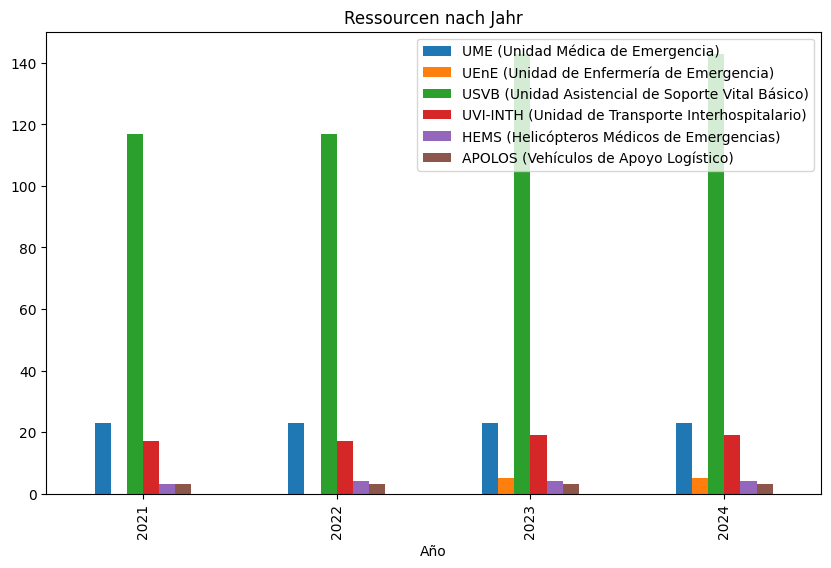

In [27]:
data_csv.groupby('Año').sum(numeric_only=True).plot(
    kind='bar', 
    figsize=(10, 6), 
    title="Ressourcen nach Jahr"
)


In [28]:
print("Fehlende Werte in JSON-Daten:\n", df_json.isnull().sum())
print("Fehlende Werte in CSV-Daten:\n", data_csv.isnull().sum())


Fehlende Werte in JSON-Daten:
 usvb_unidad_asistencial_de_soporte_vital_basico     0
apolos_vehiculos_de_apoyo_logistico                 0
ume_unidad_medica_de_emergencia                     0
ano                                                 0
provincia                                           0
hems_helicopteros_medicos_de_emergencias            0
uvi_inth_unidad_de_transporte_interhospitalario     0
uene_unidad_de_enfermeria_de_emergencia            18
dtype: int64
Fehlende Werte in CSV-Daten:
 Año                                                   0
Provincia                                             0
UME (Unidad Médica de Emergencia)                     0
UEnE (Unidad de Enfermería de Emergencia)            18
USVB (Unidad Asistencial de Soporte Vital Básico)     0
UVI-INTH (Unidad de Transporte Interhospitalario)     0
HEMS (Helicópteros Médicos de Emergencias)            0
APOLOS (Vehículos de Apoyo Logístico)                 0
dtype: int64


In [29]:
print("Statistiken JSON-Daten:\n", df_json.describe())
print("Statistiken CSV-Daten:\n", data_csv.describe())


Statistiken JSON-Daten:
        usvb_unidad_asistencial_de_soporte_vital_basico  \
count                                        36.000000   
mean                                         14.444444   
std                                           4.500441   
min                                           8.000000   
25%                                          11.000000   
50%                                          14.500000   
75%                                          17.000000   
max                                          24.000000   

       apolos_vehiculos_de_apoyo_logistico  ume_unidad_medica_de_emergencia  \
count                            36.000000                        36.000000   
mean                              0.333333                         2.555556   
std                               0.478091                         1.080858   
min                               0.000000                         1.000000   
25%                               0.000000               

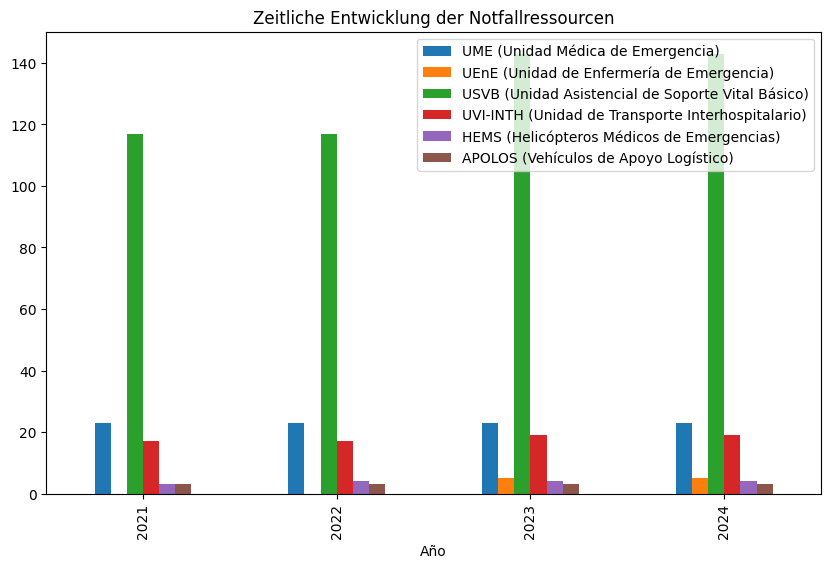

In [31]:
data_csv.groupby("Año").sum().plot(kind="bar", figsize=(10, 6), title="Zeitliche Entwicklung der Notfallressourcen");


In [32]:
# Gruppieren nach 'provincia' und Summe der USVB-Einheiten berechnen
aggregated_data = df_json.groupby('provincia')['usvb_unidad_asistencial_de_soporte_vital_basico'].sum().reset_index()

# Gesamtanzahl der USVB-Einheiten berechnen
total_units = aggregated_data['usvb_unidad_asistencial_de_soporte_vital_basico'].sum()

# Prozentuale Verteilung berechnen
aggregated_data['prozent'] = (aggregated_data['usvb_unidad_asistencial_de_soporte_vital_basico'] / total_units) * 100

In [33]:
aggregated_data

,provincia,usvb_unidad_asistencial_de_soporte_vital_basico,prozent
0,Burgos,70.0,13.461538
1,León,92.0,17.692308
2,Palencia,38.0,7.307692
3,Salamanca,70.0,13.461538
4,Segovia,42.0,8.076923
5,Soria,40.0,7.692308
6,Valladolid,60.0,11.538462
7,Zamora,52.0,10.000000
8,Ávila,56.0,10.769231


## Visualización de Datos
Generamos gráficos para explorar la distribución de los recursos.

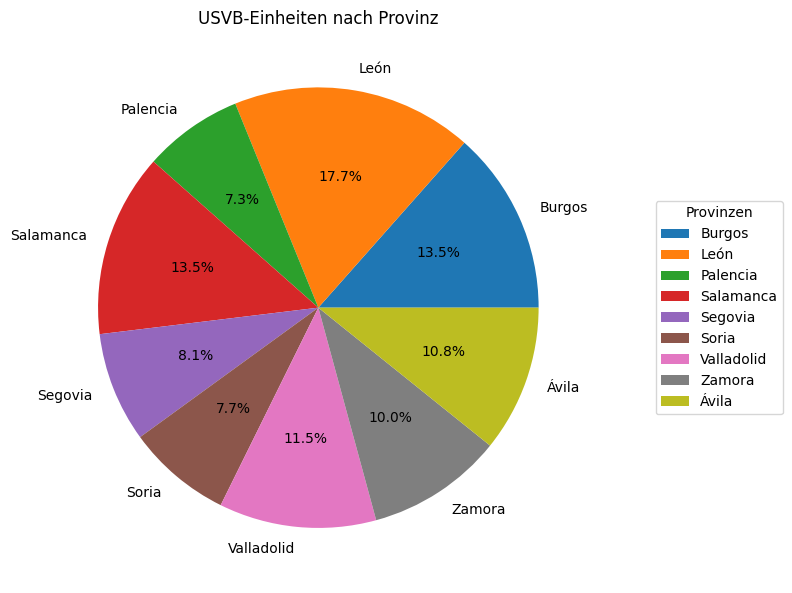

In [34]:
ax = data_csv.groupby('Provincia').sum(numeric_only=True).plot.pie(
    y='USVB (Unidad Asistencial de Soporte Vital Básico)',
    autopct='%1.1f%%',
    figsize=(8, 8),
    title="USVB-Einheiten nach Provinz",
    legend=False  
)

ax.legend(
    loc="center left", 
    bbox_to_anchor=(1.1, 0.5),  # Position rechts von der Grafik
    title="Provinzen"
)

ax.set_ylabel("")  # Entfernt die y-Achsenbeschriftung

plt.tight_layout()
plt.show()


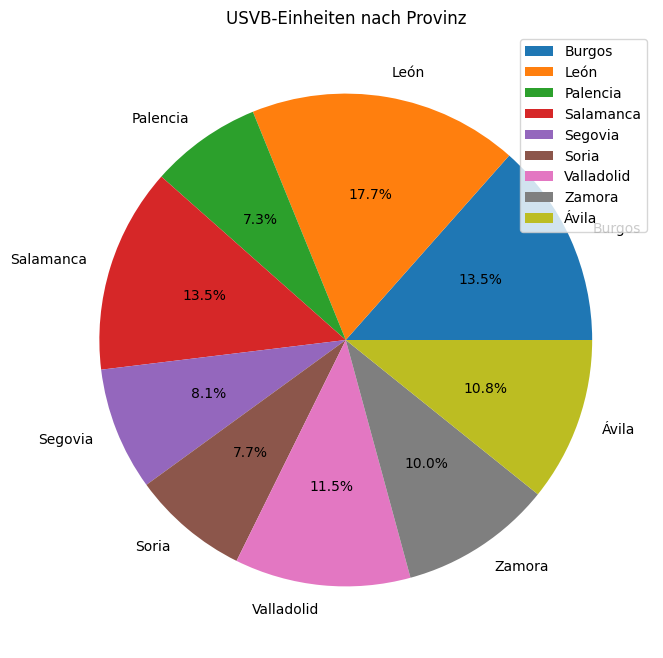

In [35]:
data_csv.groupby('Provincia').sum(numeric_only=True).plot.pie(
    y='USVB (Unidad Asistencial de Soporte Vital Básico)',  # Stellen Sie sicher, dass hier der richtige Spaltenname verwendet wird
    autopct='%1.1f%%',
    figsize=(8, 8),
    title="USVB-Einheiten nach Provinz",
    ylabel=''  # Entfernt die Beschriftung der Y-Achse
);



## Visualización de Datos
Generamos gráficos para explorar la distribución de los recursos.

In [36]:
plt.savefig("usvb_einheiten_nach_provinz.png", dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

In [37]:
aggregated_data = df_json.groupby('provincia')['ume_unidad_medica_de_emergencia'].sum().reset_index()

total_units = aggregated_data['ume_unidad_medica_de_emergencia'].sum()

aggregated_data['prozent'] = (aggregated_data['ume_unidad_medica_de_emergencia'] / total_units) * 100

print(aggregated_data)


    provincia  ume_unidad_medica_de_emergencia    prozent
0      Burgos                             16.0  17.391304
1        León                             12.0  13.043478
2    Palencia                              8.0   8.695652
3   Salamanca                             12.0  13.043478
4     Segovia                              4.0   4.347826
5       Soria                              4.0   4.347826
6  Valladolid                             16.0  17.391304
7      Zamora                             12.0  13.043478
8       Ávila                              8.0   8.695652


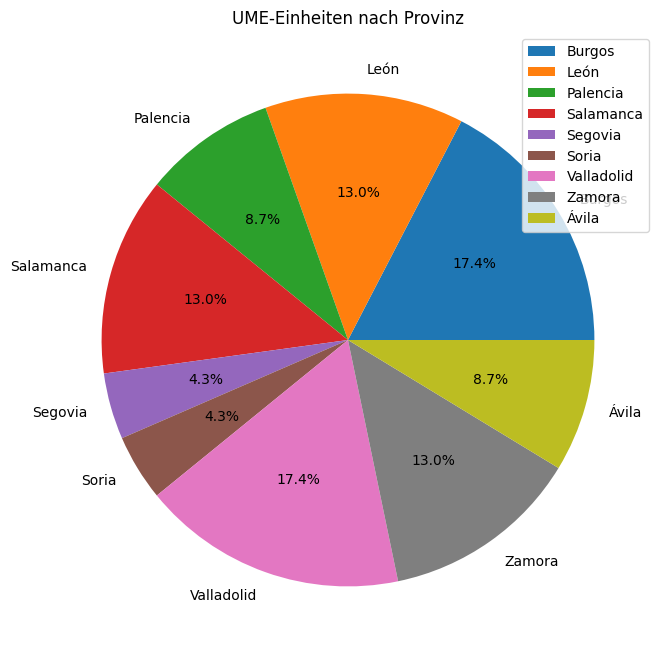

In [38]:
data_csv.groupby('Provincia').sum(numeric_only=True).plot.pie(
    y='UME (Unidad Médica de Emergencia)',  
    autopct='%1.1f%%', 
    figsize=(8, 8), 
    title="UME-Einheiten nach Provinz", 
    ylabel=''  
);


## Visualización de Datos
Generamos gráficos para explorar la distribución de los recursos.

In [39]:
plt.savefig("ume_einheiten_nach_provinz.png", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [40]:
print("JSON-Spalten:", df_json.columns)
print("CSV-Spalten:", data_csv.columns)


JSON-Spalten: Index(['usvb_unidad_asistencial_de_soporte_vital_basico',
       'apolos_vehiculos_de_apoyo_logistico',
       'ume_unidad_medica_de_emergencia', 'ano', 'provincia',
       'hems_helicopteros_medicos_de_emergencias',
       'uvi_inth_unidad_de_transporte_interhospitalario',
       'uene_unidad_de_enfermeria_de_emergencia'],
      dtype='object')
CSV-Spalten: Index(['Año', 'Provincia', 'UME (Unidad Médica de Emergencia)',
       'UEnE (Unidad de Enfermería de Emergencia)',
       'USVB (Unidad Asistencial de Soporte Vital Básico)',
       'UVI-INTH (Unidad de Transporte Interhospitalario)',
       'HEMS (Helicópteros Médicos de Emergencias)',
       'APOLOS (Vehículos de Apoyo Logístico)'],
      dtype='object')


In [41]:
json_columns_mapping = {
    'usvb_unidad_asistencial_de_soporte_vital_basico': 'USVB',
    'apolos_vehiculos_de_apoyo_logistico': 'APOLOS',
    'ume_unidad_medica_de_emergencia': 'UME',
    'ano': 'Año',
    'provincia': 'Provincia',
    'hems_helicopteros_medicos_de_emergencias': 'HEMS',
    'uvi_inth_unidad_de_transporte_interhospitalario': 'UVI-INTH',
    'uene_unidad_de_enfermeria_de_emergencia': 'UeNE'
}

df_json.rename(columns=json_columns_mapping, inplace=True)


In [42]:
csv_columns_mapping = {
    'UME (Unidad Médica de Emergencia)': 'UME',
    'UeNE (Unidad de Enfermería de Emergencia)': 'UeNE',
    'USVB (Unidad Asistencial de Soporte Vital Básico)': 'USVB',
    'UVI-INTH (Unidad de Transporte Interhospitalario)': 'UVI-INTH',
    'HEMS (Helicópteros Médicos de Emergencias)': 'HEMS',
    'APOLOS (Vehículos de Apoyo Logístico)': 'APOLOS'
}

data_csv.rename(columns=csv_columns_mapping, inplace=True)


In [43]:
df_json['Año'] = df_json['Año'].astype(int)
data_csv['Año'] = data_csv['Año'].astype(int)


In [44]:
print(df_json[['USVB', 'APOLOS', 'UME', 'HEMS', 'UVI-INTH']].sum())

USVB        520.0
APOLOS       12.0
UME          92.0
HEMS         15.0
UVI-INTH     72.0
dtype: float64


In [45]:
print(data_csv[['USVB', 'APOLOS', 'UME', 'HEMS', 'UVI-INTH']].sum())

USVB        520.0
APOLOS       12.0
UME          92.0
HEMS         15.0
UVI-INTH     72.0
dtype: float64


In [46]:
merged_df = pd.merge(df_json, data_csv, on=['Año', 'Provincia'], how='outer')


In [47]:
merged_df.head()

,USVB_x,APOLOS_x,UME_x,Año,Provincia,HEMS_x,UVI-INTH_x,UeNE,UME_y,UEnE (Unidad de Enfermería de Emergencia),USVB_y,UVI-INTH_y,HEMS_y,APOLOS_y
0,17.0,1.0,4.0,2021,Burgos,1.0,4.0,NaN,4.0,NaN,17.0,4.0,1.0,1.0
1,22.0,0.0,3.0,2021,León,1.0,2.0,NaN,3.0,NaN,22.0,2.0,1.0,0.0
2,8.0,0.0,2.0,2021,Palencia,0.0,2.0,NaN,2.0,NaN,8.0,2.0,0.0,0.0
3,15.0,1.0,3.0,2021,Salamanca,1.0,1.0,NaN,3.0,NaN,15.0,1.0,1.0,1.0
4,10.0,0.0,1.0,2021,Segovia,0.0,1.0,NaN,1.0,NaN,10.0,1.0,0.0,0.0


In [48]:
print(merged_df[['USVB_x', 'USVB_y', 'APOLOS_x', 'APOLOS_y', 'UME_x', 'UME_y', 'HEMS_x', 'HEMS_y', 'UVI-INTH_x', 'UVI-INTH_y']].head())


   USVB_x  USVB_y  APOLOS_x  APOLOS_y  UME_x  UME_y  HEMS_x  HEMS_y  \
0    17.0    17.0       1.0       1.0    4.0    4.0     1.0     1.0   
1    22.0    22.0       0.0       0.0    3.0    3.0     1.0     1.0   
2     8.0     8.0       0.0       0.0    2.0    2.0     0.0     0.0   
3    15.0    15.0       1.0       1.0    3.0    3.0     1.0     1.0   
4    10.0    10.0       0.0       0.0    1.0    1.0     0.0     0.0   

   UVI-INTH_x  UVI-INTH_y  
0         4.0         4.0  
1         2.0         2.0  
2         2.0         2.0  
3         1.0         1.0  
4         1.0         1.0  


## Limpieza de Datos
Realizamos la limpieza de datos eliminando columnas irrelevantes o tratando valores nulos para mejorar la calidad de los datos.

In [49]:
# Zusammenführen aller relevanten Spalten
merged_df['USVB'] = merged_df['USVB_x'].combine_first(merged_df['USVB_y'])
merged_df['APOLOS'] = merged_df['APOLOS_x'].combine_first(merged_df['APOLOS_y'])
merged_df['UME'] = merged_df['UME_x'].combine_first(merged_df['UME_y'])
merged_df['HEMS'] = merged_df['HEMS_x'].combine_first(merged_df['HEMS_y'])
merged_df['UVI-INTH'] = merged_df['UVI-INTH_x'].combine_first(merged_df['UVI-INTH_y'])

# Entfernen der alten Spalten mit Suffixen
merged_df = merged_df.drop(columns=[
    'USVB_x', 'USVB_y',
    'APOLOS_x', 'APOLOS_y',
    'UME_x', 'UME_y',
    'HEMS_x', 'HEMS_y',
    'UVI-INTH_x', 'UVI-INTH_y'
])


print(merged_df.head())



    Año  Provincia UeNE  UEnE (Unidad de Enfermería de Emergencia)  USVB  \
0  2021     Burgos  NaN                                        NaN  17.0   
1  2021       León  NaN                                        NaN  22.0   
2  2021   Palencia  NaN                                        NaN   8.0   
3  2021  Salamanca  NaN                                        NaN  15.0   
4  2021    Segovia  NaN                                        NaN  10.0   

   APOLOS  UME  HEMS  UVI-INTH  
0     1.0  4.0   1.0       4.0  
1     0.0  3.0   1.0       2.0  
2     0.0  2.0   0.0       2.0  
3     1.0  3.0   1.0       1.0  
4     0.0  1.0   0.0       1.0  


In [50]:
print(merged_df[['USVB', 'APOLOS', 'UME', 'HEMS', 'UVI-INTH']].sum())


USVB        520.0
APOLOS       12.0
UME          92.0
HEMS         15.0
UVI-INTH     72.0
dtype: float64


In [51]:
print(merged_df.dtypes) 


Año                                            int64
Provincia                                     object
UeNE                                          object
UEnE (Unidad de Enfermería de Emergencia)    float64
USVB                                         float64
APOLOS                                       float64
UME                                          float64
HEMS                                         float64
UVI-INTH                                     float64
dtype: object


In [52]:
merged_df['UeNE'] = pd.to_numeric(merged_df['UeNE'], errors='coerce')


In [53]:
null_count = merged_df['UeNE'].isnull().sum()
print(f"Anzahl der Nullwerte in der UeNE-Spalte: {null_count}")

Anzahl der Nullwerte in der UeNE-Spalte: 18


In [54]:
null_count = merged_df['UEnE (Unidad de Enfermería de Emergencia)'].isnull().sum()
print(f"Anzahl der Nullwerte in der UEnE (Unidad de Enfermería de Emergencia)-Spalte: {null_count}")

Anzahl der Nullwerte in der UEnE (Unidad de Enfermería de Emergencia)-Spalte: 18


In [55]:
# Vergleich der Inhalte der beiden Spalten
vergleich = merged_df['UeNE'].equals(merged_df['UEnE (Unidad de Enfermería de Emergencia)'])

if vergleich:
    print("Die beiden Spalten enthalten die gleichen Inhalte.")
else:
    print("Die beiden Spalten enthalten unterschiedliche Inhalte.")


Die beiden Spalten enthalten die gleichen Inhalte.


## Limpieza de Datos
Realizamos la limpieza de datos eliminando columnas irrelevantes o tratando valores nulos para mejorar la calidad de los datos.

In [56]:
merged_df = merged_df.drop(columns=['UEnE (Unidad de Enfermería de Emergencia)'])


In [57]:
print(merged_df['UeNE'])

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    0.0
19    0.0
20    1.0
21    1.0
22    2.0
23    0.0
24    0.0
25    1.0
26    0.0
27    0.0
28    0.0
29    1.0
30    1.0
31    2.0
32    0.0
33    0.0
34    1.0
35    0.0
Name: UeNE, dtype: float64


## Limpieza de Datos
Realizamos la limpieza de datos eliminando columnas irrelevantes o tratando valores nulos para mejorar la calidad de los datos.

In [58]:
# Median berechnen und auf eine Dezimalstelle runden
median_uene = round(merged_df['UeNE'].median(), 1)

# Fehlende Werte mit dem gerundeten Median auffüllen
merged_df['UeNE'] = merged_df['UeNE'].fillna(median_uene)

print(f"Anzahl der fehlenden Werte in UeNE nach Auffüllen: {merged_df['UeNE'].isnull().sum()}")

print(merged_df[['Año', 'Provincia', 'UeNE']].head())


Anzahl der fehlenden Werte in UeNE nach Auffüllen: 0
    Año  Provincia  UeNE
0  2021     Burgos   0.0
1  2021       León   0.0
2  2021   Palencia   0.0
3  2021  Salamanca   0.0
4  2021    Segovia   0.0


In [59]:
print(merged_df.columns)


Index(['Año', 'Provincia', 'UeNE', 'USVB', 'APOLOS', 'UME', 'HEMS',
       'UVI-INTH'],
      dtype='object')


In [60]:
print(merged_df.head())  
print(merged_df.info())  


    Año  Provincia  UeNE  USVB  APOLOS  UME  HEMS  UVI-INTH
0  2021     Burgos   0.0  17.0     1.0  4.0   1.0       4.0
1  2021       León   0.0  22.0     0.0  3.0   1.0       2.0
2  2021   Palencia   0.0   8.0     0.0  2.0   0.0       2.0
3  2021  Salamanca   0.0  15.0     1.0  3.0   1.0       1.0
4  2021    Segovia   0.0  10.0     0.0  1.0   0.0       1.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Año        36 non-null     int64  
 1   Provincia  36 non-null     object 
 2   UeNE       36 non-null     float64
 3   USVB       36 non-null     float64
 4   APOLOS     36 non-null     float64
 5   UME        36 non-null     float64
 6   HEMS       36 non-null     float64
 7   UVI-INTH   36 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 2.4+ KB
None


In [61]:
output_file = "merged_data.csv"
merged_df.to_csv(output_file, index=False, encoding="utf-8")

print(f"Die Datei wurde erfolgreich als {output_file} gespeichert.")


Die Datei wurde erfolgreich als merged_data.csv gespeichert.


In [62]:
print(merged_df[['UeNE', 'USVB', 'APOLOS', 'UME', 'HEMS', 'UVI-INTH']].sum())


UeNE         10.0
USVB        520.0
APOLOS       12.0
UME          92.0
HEMS         15.0
UVI-INTH     72.0
dtype: float64


In [63]:
print(df_json[['USVB', 'APOLOS', 'UME', 'HEMS', 'UVI-INTH']].sum())
print(data_csv[['USVB', 'APOLOS', 'UME', 'HEMS', 'UVI-INTH']].sum())


USVB        520.0
APOLOS       12.0
UME          92.0
HEMS         15.0
UVI-INTH     72.0
dtype: float64
USVB        520.0
APOLOS       12.0
UME          92.0
HEMS         15.0
UVI-INTH     72.0
dtype: float64


## Limpieza de Datos
Realizamos la limpieza de datos eliminando columnas irrelevantes o tratando valores nulos para mejorar la calidad de los datos.

In [64]:
# Berechnung der Gesamtsummen für numerische Spalten in merged_df (ohne 'Año')
summen_df = merged_df.drop(columns=['Año'], errors='ignore').sum(numeric_only=True)

gesamt_summe = summen_df.sum()

prozent_df = (summen_df / gesamt_summe) * 100

print("Summen:")
print(summen_df)
print("\nProzentuale Anteile:")
print(prozent_df)


Summen:
UeNE         10.0
USVB        520.0
APOLOS       12.0
UME          92.0
HEMS         15.0
UVI-INTH     72.0
dtype: float64

Prozentuale Anteile:
UeNE         1.386963
USVB        72.122053
APOLOS       1.664355
UME         12.760055
HEMS         2.080444
UVI-INTH     9.986130
dtype: float64


## Limpieza de Datos
Realizamos la limpieza de datos eliminando columnas irrelevantes o tratando valores nulos para mejorar la calidad de los datos.

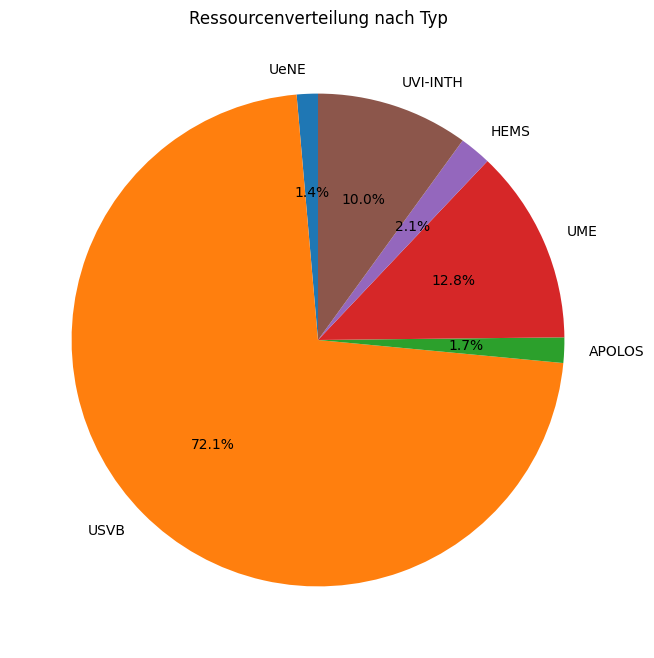

In [65]:
merged_df.sum(numeric_only=True).drop('Año', errors='ignore').plot.pie(
    figsize=(8, 8),
    autopct='%1.1f%%',
    startangle=90,
    title="Ressourcenverteilung nach Typ"
);


## Visualización de Datos
Generamos gráficos para explorar la distribución de los recursos.

In [66]:
output_file = "ressourcenverteilung.png"
plt.savefig(output_file, format="png", dpi=300, bbox_inches="tight")
plt.show()

<Figure size 640x480 with 0 Axes>

## Limpieza de Datos
Realizamos la limpieza de datos eliminando columnas irrelevantes o tratando valores nulos para mejorar la calidad de los datos.

<Axes: title={'center': 'Ressourcenverteilung nach Typ'}>

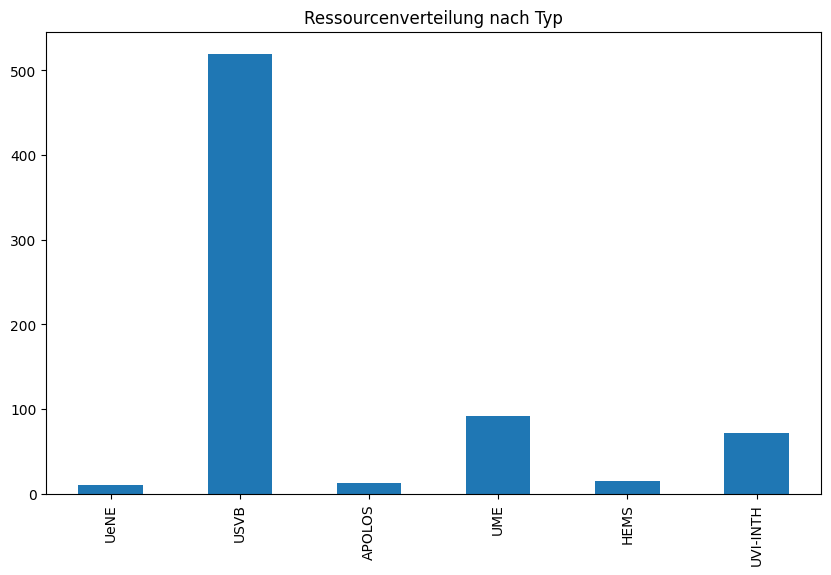

In [67]:
merged_df.sum(numeric_only=True).drop('Año', errors='ignore').plot.bar(
    figsize=(10, 6), 
    title="Ressourcenverteilung nach Typ"
)


In [68]:
summen_pro_jahr = merged_df.groupby('Año').sum(numeric_only=True)

print(summen_pro_jahr)


      UeNE   USVB  APOLOS   UME  HEMS  UVI-INTH
Año                                            
2021   0.0  117.0     3.0  23.0   3.0      17.0
2022   0.0  117.0     3.0  23.0   4.0      17.0
2023   5.0  143.0     3.0  23.0   4.0      19.0
2024   5.0  143.0     3.0  23.0   4.0      19.0


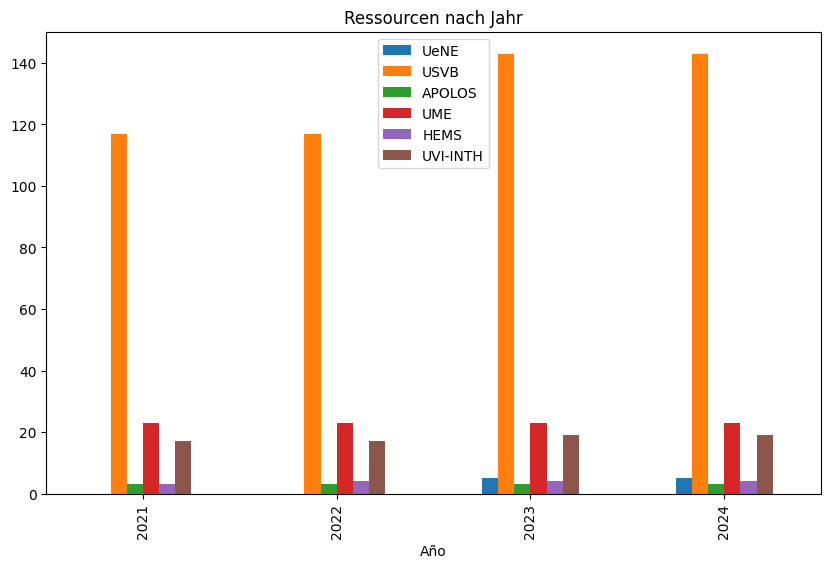

In [69]:
merged_df.groupby('Año').sum(numeric_only=True).plot(
    kind='bar', 
    figsize=(10, 6), 
    title="Ressourcen nach Jahr"
);


## Visualización de Datos
Generamos gráficos para explorar la distribución de los recursos.

In [70]:
# Speichern der Grafik
output_file = "ressourcen_nach_jahr_exp.png"
plt.savefig(output_file, format="png", dpi=300, bbox_inches="tight")
plt.show()

print(f"Die Grafik wurde erfolgreich als {output_file} gespeichert.")

<Figure size 640x480 with 0 Axes>

Die Grafik wurde erfolgreich als ressourcen_nach_jahr_exp.png gespeichert.


In [71]:
summen_pro_provinz = merged_df.groupby('Provincia').sum(numeric_only=True)
summen_pro_provinz

,Año,UeNE,USVB,APOLOS,UME,HEMS,UVI-INTH
Provincia,,,,,,,
Burgos,8090,0.0,70.0,4.0,16.0,4.0,14.0
León,8090,0.0,92.0,0.0,12.0,4.0,8.0
Palencia,8090,2.0,38.0,0.0,8.0,0.0,8.0
Salamanca,8090,2.0,70.0,4.0,12.0,4.0,4.0
Segovia,8090,4.0,42.0,0.0,4.0,0.0,6.0
Soria,8090,0.0,40.0,0.0,4.0,0.0,6.0
Valladolid,8090,0.0,60.0,4.0,16.0,3.0,8.0
Zamora,8090,2.0,52.0,0.0,12.0,0.0,12.0
Ávila,8090,0.0,56.0,0.0,8.0,0.0,6.0


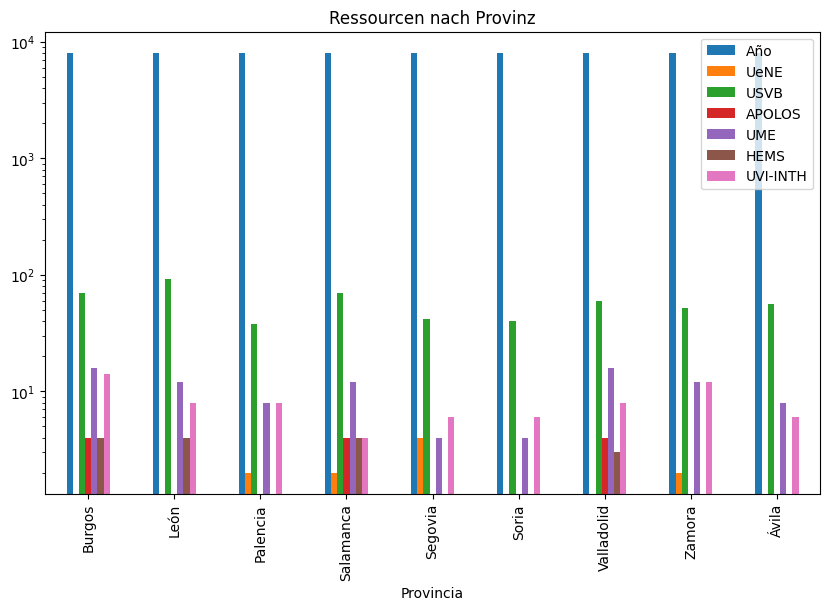

In [72]:
merged_df.groupby('Provincia').sum(numeric_only=True).plot(
    kind='bar',
    figsize=(10, 6),
    title="Ressourcen nach Provinz",
    logy=True  # Logarithmische Skala für die y-Achse
);


## Visualización de Datos
Generamos gráficos para explorar la distribución de los recursos.

In [73]:
output_file = "ressourcen_nach_provinz_log.png"
plt.savefig(output_file, format="png", dpi=300, bbox_inches="tight")
plt.show()

<Figure size 640x480 with 0 Axes>

<Axes: title={'center': 'Entwicklung der Ressourcen über die Jahre'}, xlabel='Año'>

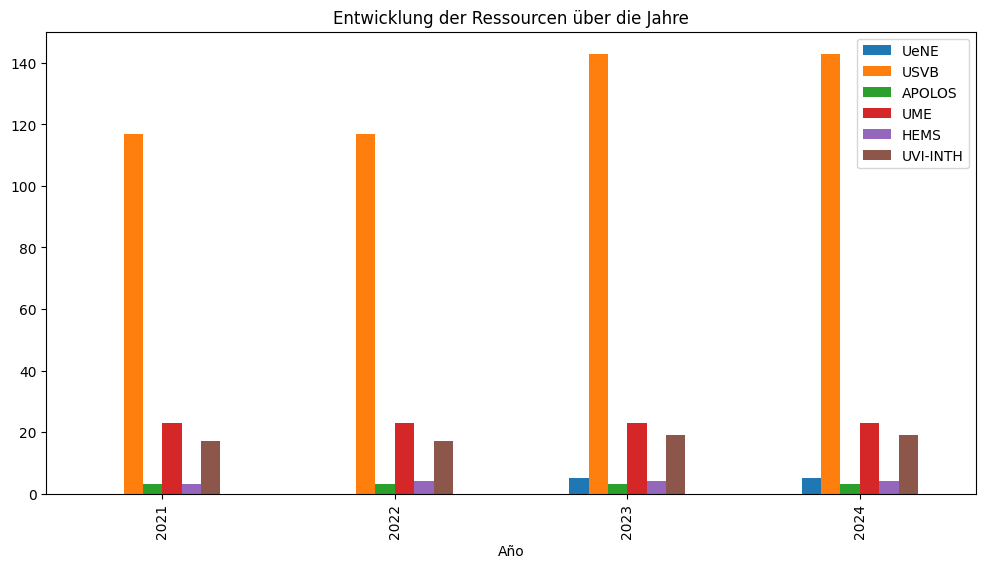

In [74]:
merged_df.groupby("Año").sum().plot(kind="bar", figsize=(12, 6), title="Entwicklung der Ressourcen über die Jahre")


In [75]:
summen_pro_jahr = merged_df.groupby('Año').sum(numeric_only=True)
print(summen_pro_jahr)


      UeNE   USVB  APOLOS   UME  HEMS  UVI-INTH
Año                                            
2021   0.0  117.0     3.0  23.0   3.0      17.0
2022   0.0  117.0     3.0  23.0   4.0      17.0
2023   5.0  143.0     3.0  23.0   4.0      19.0
2024   5.0  143.0     3.0  23.0   4.0      19.0


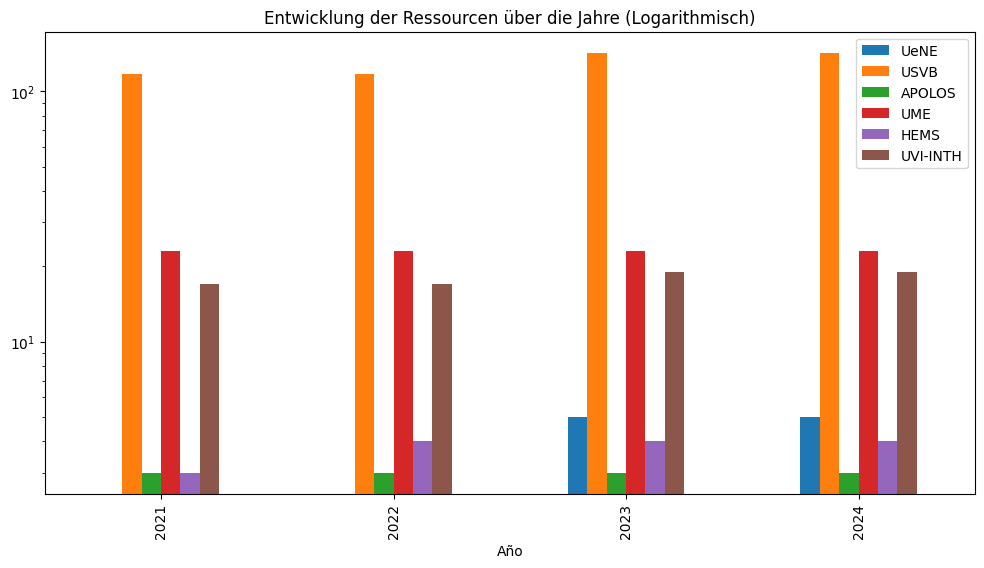

In [76]:
merged_df.groupby('Año').sum(numeric_only=True).plot(
    kind="bar",
    figsize=(12, 6),
    title="Entwicklung der Ressourcen über die Jahre (Logarithmisch)",
    logy=True  # Y-Achse logarithmisch skalieren
);


## Visualización de Datos
Generamos gráficos para explorar la distribución de los recursos.

In [77]:
import matplotlib.pyplot as plt

# Automatische Farbpalette
colors = plt.cm.Paired.colors  # Beispielpalette


## Limpieza de Datos
Realizamos la limpieza de datos eliminando columnas irrelevantes o tratando valores nulos para mejorar la calidad de los datos.

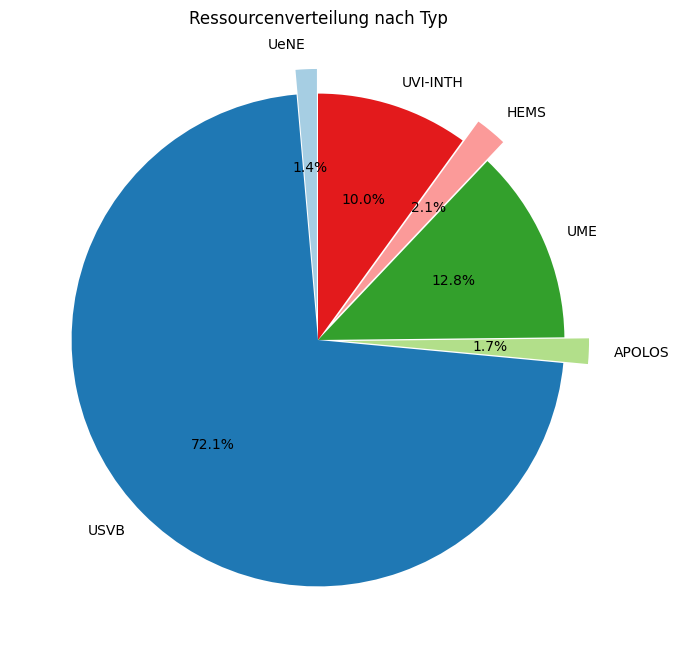

In [78]:
explode = [0.1 if value < 20 else 0 for value in merged_df.sum(numeric_only=True).drop('Año', errors='ignore')]

merged_df.sum(numeric_only=True).drop('Año', errors='ignore').plot.pie(
    figsize=(8, 8),
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    title="Ressourcenverteilung nach Typ",
    explode=explode
);


## Visualización de Datos
Generamos gráficos para explorar la distribución de los recursos.

In [79]:
plt.savefig("ressourcenverteilung.png", bbox_inches="tight", dpi=300)


<Figure size 640x480 with 0 Axes>

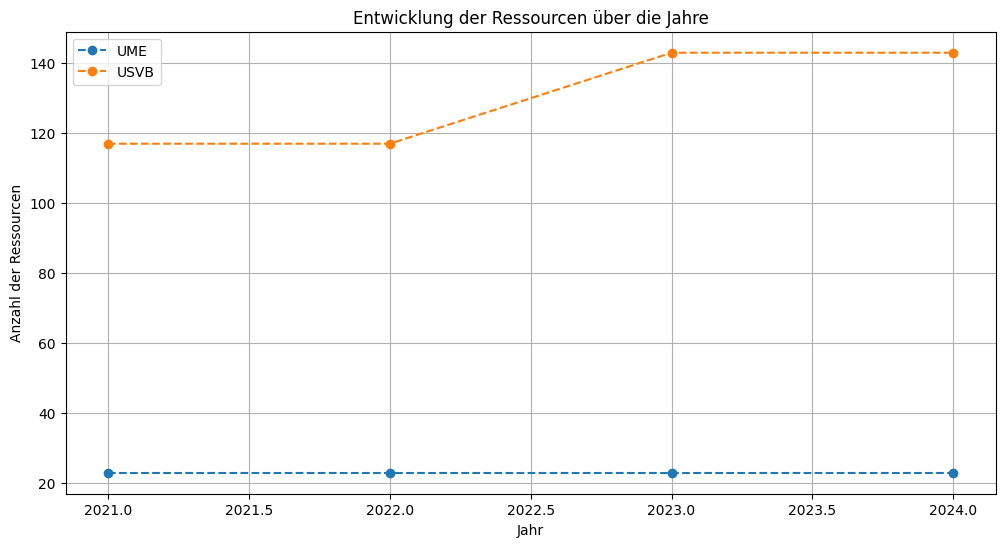

In [81]:
merged_df.groupby("Año")[["UME", "USVB"]].sum().plot(
    kind="line",
    figsize=(12, 6),
    title="Entwicklung der Ressourcen über die Jahre",
    xlabel="Jahr",
    ylabel="Anzahl der Ressourcen",
    marker="o", 
    linestyle="--", 
    grid=True  
);



## Visualización de Datos
Generamos gráficos para explorar la distribución de los recursos.

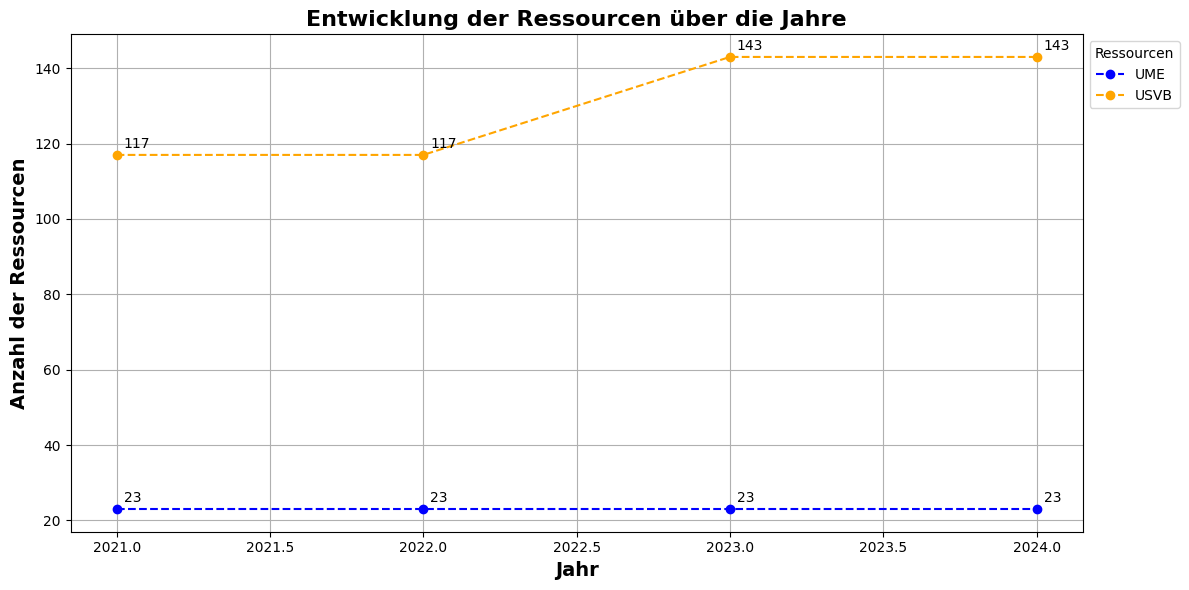

In [82]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# Daten gruppieren und plotten
ax = merged_df.groupby("Año")[["UME", "USVB"]].sum().plot(
    kind="line",
    figsize=(12, 6),
    title="Entwicklung der Ressourcen über die Jahre",
    marker="o",
    linestyle="--",
    grid=True,
    color=["blue", "orange"]
)

# Achsentitel anpassen
ax.set_xlabel("Jahr", fontsize=14, fontweight="bold")
ax.set_ylabel("Anzahl der Ressourcen", fontsize=14, fontweight="bold")
ax.set_title("Entwicklung der Ressourcen über die Jahre", fontsize=16, fontweight="bold")

# Legende positionieren
ax.legend(title="Ressourcen", loc="upper left", bbox_to_anchor=(1, 1))

# Werte annotieren
data = merged_df.groupby("Año")[["UME", "USVB"]].sum()
for line in ax.get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.annotate(f"{y:.0f}", (x, y), textcoords="offset points", xytext=(5, 5), fontsize=10)

plt.tight_layout()
plt.show()


## Visualización de Datos
Generamos gráficos para explorar la distribución de los recursos.

                   Año          UeNE      USVB        APOLOS           UME  \
Año       1.000000e+00  4.449942e-01  0.291144 -7.162100e-15 -7.029608e-15   
UeNE      4.449942e-01  1.000000e+00 -0.094677 -1.407195e-01 -2.593495e-01   
USVB      2.911441e-01 -9.467658e-02  1.000000  3.541071e-01  6.056389e-01   
APOLOS   -7.162100e-15 -1.407195e-01  0.354107  1.000000e+00  7.372098e-01   
UME      -7.029608e-15 -2.593495e-01  0.605639  7.372098e-01  1.000000e+00   
HEMS      7.559289e-02 -2.186496e-01  0.778760  7.171372e-01  7.225301e-01   
UVI-INTH  1.217161e-01  1.449634e-16  0.199333  1.443376e-01  5.107539e-01   

              HEMS      UVI-INTH  
Año       0.075593  1.217161e-01  
UeNE     -0.218650  1.449634e-16  
USVB      0.778760  1.993327e-01  
APOLOS    0.717137  1.443376e-01  
UME       0.722530  5.107539e-01  
HEMS      1.000000  1.380131e-01  
UVI-INTH  0.138013  1.000000e+00  


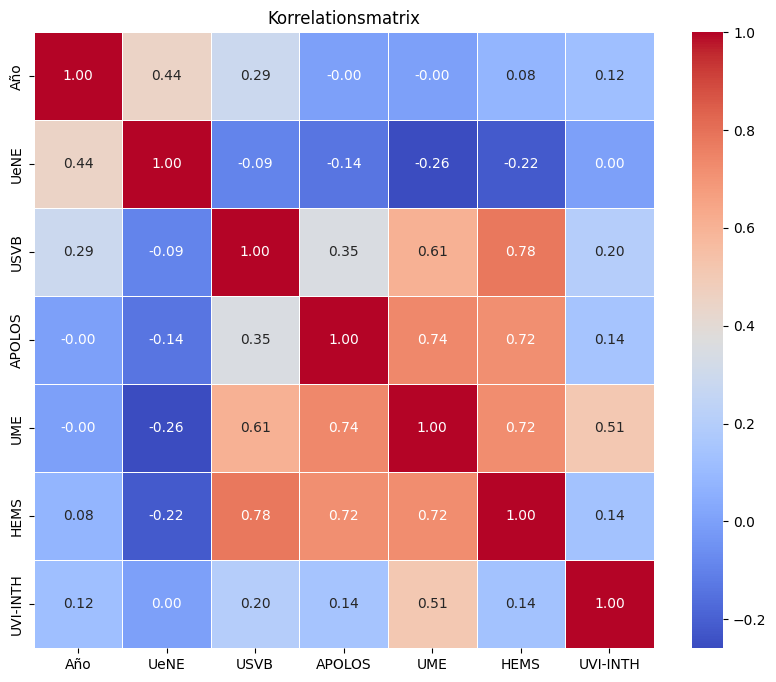

In [83]:
numerical_columns = merged_df.select_dtypes(include=['number'])
correlation_matrix = numerical_columns.corr()
print(correlation_matrix)

# Heatmap der Korrelationen visualisieren
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korrelationsmatrix")
plt.show()


## Carga de Datos
Cargamos los datos necesarios para el análisis.

In [84]:
import pandas as pd

# Datei laden
bevoelkerung_file = "csv.poblacion.csv"
bevoelkerung_data = pd.read_csv(bevoelkerung_file, sep=";", encoding="utf-8")  # Oder "latin1" falls nötig

# Datenstruktur prüfen
print(bevoelkerung_data.head())
print(bevoelkerung_data.info())



       Edad simple\tProvincias\tSexo\tPeriodo\tTotal
0  Todas las edades\tTotal Nacional\tTotal\t1 de ...
1  Todas las edades\tTotal Nacional\tTotal\t1 de ...
2  Todas las edades\tTotal Nacional\tTotal\t1 de ...
3  Todas las edades\tTotal Nacional\tTotal\t1 de ...
4  Todas las edades\tTotal Nacional\tTotal\t1 de ...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3422793 entries, 0 to 3422792
Data columns (total 1 columns):
 #   Column                                     Dtype 
---  ------                                     ----- 
 0   Edad simple	Provincias	Sexo	Periodo	Total  object
dtypes: object(1)
memory usage: 26.1+ MB
None


## Carga de Datos
Cargamos los datos necesarios para el análisis.

In [85]:
# Datei erneut einlesen mit korrektem Trennzeichen
bevoelkerung_data = pd.read_csv(bevoelkerung_file, sep="\t", encoding="utf-8")  # Beispiel mit Tabulator als Trennzeichen


C:\Users\kthfu\AppData\Local\Temp\ipykernel_5996\3189565079.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  bevoelkerung_data = pd.read_csv(bevoelkerung_file, sep="\t", encoding="utf-8")  # Beispiel mit Tabulator als Trennzeichen


In [86]:
print(bevoelkerung_data.columns)
print(bevoelkerung_data.head())


Index(['Edad simple', 'Provincias', 'Sexo', 'Periodo', 'Total'], dtype='object')
        Edad simple      Provincias   Sexo               Periodo       Total
0  Todas las edades  Total Nacional  Total    1 de enero de 2023  48.085.361
1  Todas las edades  Total Nacional  Total  1 de octubre de 2022  47.940.295
2  Todas las edades  Total Nacional  Total    1 de julio de 2022  47.781.354
3  Todas las edades  Total Nacional  Total    1 de abril de 2022  47.609.145
4  Todas las edades  Total Nacional  Total    1 de enero de 2022  47.486.727


## Carga de Datos
Cargamos los datos necesarios para el análisis.

In [87]:
bevolkerung_data = pd.read_csv(bevoelkerung_file, sep="\t", encoding="utf-8", low_memory=False)


In [88]:
print(bevoelkerung_data.info())
print(bevoelkerung_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3422793 entries, 0 to 3422792
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Edad simple  object
 1   Provincias   object
 2   Sexo         object
 3   Periodo      object
 4   Total        object
dtypes: object(5)
memory usage: 130.6+ MB
None
        Edad simple      Provincias   Sexo               Periodo       Total
0  Todas las edades  Total Nacional  Total    1 de enero de 2023  48.085.361
1  Todas las edades  Total Nacional  Total  1 de octubre de 2022  47.940.295
2  Todas las edades  Total Nacional  Total    1 de julio de 2022  47.781.354
3  Todas las edades  Total Nacional  Total    1 de abril de 2022  47.609.145
4  Todas las edades  Total Nacional  Total    1 de enero de 2022  47.486.727


In [89]:
print(bevoelkerung_data.columns)

Index(['Edad simple', 'Provincias', 'Sexo', 'Periodo', 'Total'], dtype='object')


In [104]:
import os

print("Aktuelles Arbeitsverzeichnis:", os.getcwd())
print("Dateien im Verzeichnis:", os.listdir())


Aktuelles Arbeitsverzeichnis: c:\Users\kthfu\DS_Work\Mi-primer-EDA
Dateien im Verzeichnis: ['0-Proyecto_EDA.ipynb', '1-Guia-EDA.ipynb', 'csv.poblacion.csv', 'EDA_resourcen.ipynb', 'Emerg_json_rel_daten.csv', 'Emerg_Resource.csv', 'entpackt', 'entwicklung_ressourcen_über_Jahre_logaritmisch.png', 'log_resourcen_nach_provinz.png', 'markdown.beschreibung_EDA.md', 'merged_data.csv', 'Neues_EDA_Projekt.ipynb', 'Project_Break_I__EDA', 'resourcenentwicklung_nach_jahren.png', 'resourcen_nach_provinz.png', 'ressourcenverteilung.neu.png', 'ressourcenverteilung.png', 'ressourcen_nach_jahr_exp.png', 'ressourcen_nach_provinz_log.png', 'Risorse per le cure di emergenza.zip', 'Robert-Koch-Institut', 'ume_einheiten_nach_provinz.png', 'UrfassungNotebook.ipynb', 'usvb_einheiten_nach_provinz.png', 'usvb_einheiten_nach_provinz_2.png']


In [90]:
bevoelkerung_data["Total"] = bevoelkerung_data["Total"].str.replace(".", "").astype(float)



In [91]:
print(bevoelkerung_data.info())
print(bevoelkerung_data["Total"].head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3422793 entries, 0 to 3422792
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Edad simple  object 
 1   Provincias   object 
 2   Sexo         object 
 3   Periodo      object 
 4   Total        float64
dtypes: float64(1), object(4)
memory usage: 130.6+ MB
None
0    48085361.0
1    47940295.0
2    47781354.0
3    47609145.0
4    47486727.0
Name: Total, dtype: float64


In [92]:
print(bevoelkerung_data["Total"].dtypes)


float64


In [93]:
print(bevoelkerung_data["Total"].head())


0    48085361.0
1    47940295.0
2    47781354.0
3    47609145.0
4    47486727.0
Name: Total, dtype: float64


In [94]:
# Überprüfen auf nicht-numerische Werte
print(bevoelkerung_data["Total"].isnull().sum())


3314712


In [95]:
provinz_data = bevoelkerung_data[bevoelkerung_data["Provincias"] != "Total Nacional"]

print(provinz_data["Provincias"].unique())


['02 Albacete' '03 Alicante/Alacant' '04 Almería' '01 Araba/Álava'
 '33 Asturias' '05 Ávila' '06 Badajoz' '07 Balears, Illes' '08 Barcelona'
 '48 Bizkaia' '09 Burgos' '10 Cáceres' '11 Cádiz' '39 Cantabria'
 '12 Castellón/Castelló' '13 Ciudad Real' '14 Córdoba' '15 Coruña, A'
 '16 Cuenca' '20 Gipuzkoa' '17 Girona' '18 Granada' '19 Guadalajara'
 '21 Huelva' '22 Huesca' '23 Jaén' '24 León' '25 Lleida' '27 Lugo'
 '28 Madrid' '29 Málaga' '30 Murcia' '31 Navarra' '32 Ourense'
 '34 Palencia' '35 Palmas, Las' '36 Pontevedra' '26 Rioja, La'
 '37 Salamanca' '38 Santa Cruz de Tenerife' '40 Segovia' '41 Sevilla'
 '42 Soria' '43 Tarragona' '44 Teruel' '45 Toledo' '46 Valencia/València'
 '47 Valladolid' '49 Zamora' '50 Zaragoza' '51 Ceuta' '52 Melilla']


In [96]:
# Provinznamen aus den Ressourcendaten (merged_df) anzeigen
print(merged_df["Provincia"].unique())



['Burgos' 'León' 'Palencia' 'Salamanca' 'Segovia' 'Soria' 'Valladolid'
 'Zamora' 'Ávila']


In [97]:
merged_df.columns

Index(['Año', 'Provincia', 'UeNE', 'USVB', 'APOLOS', 'UME', 'HEMS',
       'UVI-INTH'],
      dtype='object')

In [98]:
relevante_provinzen = merged_df["Provincia"].unique()
print(relevante_provinzen)  # Überprüfen der relevanten Provinzen


['Burgos' 'León' 'Palencia' 'Salamanca' 'Segovia' 'Soria' 'Valladolid'
 'Zamora' 'Ávila']


In [99]:
gefilterte_bevoelkerung = bevoelkerung_data[bevoelkerung_data["Provincias"].isin(relevante_provinzen)]
print(gefilterte_bevoelkerung.head())  # Überprüfen der gefilterten Daten


Empty DataFrame
Columns: [Edad simple, Provincias, Sexo, Periodo, Total]
Index: []


In [100]:
# Formatierung in beiden DataFrames anpassen
bevoelkerung_data["Provincias"] = bevoelkerung_data["Provincias"].str.strip().str.lower()
merged_df["Provincia"] = merged_df["Provincia"].str.strip().str.lower()


In [101]:
relevante_provinzen = merged_df["Provincia"].unique()
gefilterte_bevoelkerung = bevolkerung_data[bevolkerung_data["Provincias"].isin(relevante_provinzen)]

# Überprüfen des gefilterten DataFrames
print(gefilterte_bevoelkerung.head())


Empty DataFrame
Columns: [Edad simple, Provincias, Sexo, Periodo, Total]
Index: []


In [102]:
# Provinznamen anzeigen, die nicht übereinstimmen
provinzen_aus_bevoelkerung = bevoelkerung_data["Provincias"].unique()
provinzen_aus_merged = merged_df["Provincia"].unique()

# Namen, die nur in bevolkerung_data sind
print(set(provinzen_aus_bevoelkerung) - set(provinzen_aus_merged))

# Namen, die nur in merged_df sind
print(set(provinzen_aus_merged) - set(provinzen_aus_bevoelkerung))


{'25 lleida', '21 huelva', '28 madrid', '13 ciudad real', '11 cádiz', '04 almería', '30 murcia', '15 coruña, a', '08 barcelona', '07 balears, illes', '23 jaén', '26 rioja, la', '02 albacete', '17 girona', '37 salamanca', '16 cuenca', '42 soria', '31 navarra', '45 toledo', '38 santa cruz de tenerife', '03 alicante/alacant', '24 león', 'total nacional', '35 palmas, las', '46 valencia/valència', '49 zamora', '27 lugo', '06 badajoz', '29 málaga', '34 palencia', '33 asturias', '50 zaragoza', '52 melilla', '32 ourense', '44 teruel', '01 araba/álava', '14 córdoba', '18 granada', '22 huesca', '05 ávila', '19 guadalajara', '12 castellón/castelló', '51 ceuta', '40 segovia', '36 pontevedra', '41 sevilla', '09 burgos', '39 cantabria', '47 valladolid', '10 cáceres', '43 tarragona', '20 gipuzkoa', '48 bizkaia'}
{'segovia', 'burgos', 'león', 'salamanca', 'soria', 'ávila', 'zamora', 'valladolid', 'palencia'}


In [103]:
import re

# Entfernen von Präfix-Zahlen und Sonderzeichen
bevoelkerung_data["Provincias"] = bevoelkerung_data["Provincias"].apply(
    lambda x: re.sub(r"^\d+\s|\s[A-Za-z/,]+$", "", x).strip().lower()
)


In [104]:
import unicodedata

def remove_accents(input_str):
    return ''.join(
        c for c in unicodedata.normalize('NFD', input_str)
        if unicodedata.category(c) != 'Mn'
    )

bevoelkerung_data["Provincias"] = bevoelkerung_data["Provincias"].apply(remove_accents)
merged_df["Provincia"] = merged_df["Provincia"].apply(remove_accents)


In [105]:
provinzen_aus_bevoelkerung = bevoelkerung_data["Provincias"].unique()
provinzen_aus_merged = merged_df["Provincia"].unique()

print("Provinzen nur in bevoelkerung_data:", set(provinzen_aus_bevoelkerung) - set(provinzen_aus_merged))
print("Provinzen nur in merged_df:", set(provinzen_aus_merged) - set(provinzen_aus_bevoelkerung))


Provinzen nur in bevoelkerung_data: {'rioja,', 'balears,', 'caceres', 'ourense', 'bizkaia', 'huesca', 'tarragona', 'coruna,', 'santa cruz de', 'cadiz', 'sevilla', 'barcelona', 'albacete', 'lleida', 'girona', 'ciudad', 'murcia', 'melilla', 'pontevedra', 'total', 'cantabria', 'zaragoza', 'guadalajara', 'badajoz', 'huelva', 'teruel', 'valencia/valencia', 'jaen', 'lugo', 'ceuta', 'malaga', 'navarra', 'toledo', 'palmas,', 'castellon/castello', 'gipuzkoa', 'asturias', 'alicante/alacant', 'almeria', 'araba/alava', 'madrid', 'cordoba', 'granada', 'cuenca'}
Provinzen nur in merged_df: set()


In [106]:
bevoelkerung_data.rename(columns={"Provincias": "Provincia"}, inplace=True)


In [107]:
print(bevoelkerung_data.columns)
print(merged_df.columns)


Index(['Edad simple', 'Provincia', 'Sexo', 'Periodo', 'Total'], dtype='object')
Index(['Año', 'Provincia', 'UeNE', 'USVB', 'APOLOS', 'UME', 'HEMS',
       'UVI-INTH'],
      dtype='object')


In [108]:
# Relevante Provinzen filtern
relevante_provinzen = merged_df["Provincia"].unique()
gefilterte_bevoelkerung = bevoelkerung_data[bevoelkerung_data["Provincia"].isin(relevante_provinzen)]




In [109]:
# Relevante Provinzen filtern
relevante_provinzen = merged_df["Provincia"].unique()
gefilterte_bevoelkerung = bevoelkerung_data[bevoelkerung_data["Provincia"].isin(relevante_provinzen)]

# Merge durchführen
merged_final = pd.merge(merged_df, gefilterte_bevoelkerung, on="Provincia", how="inner")

# Daten speichern
output_file = "merged_final.csv"
merged_final.to_csv(output_file, index=False, encoding="utf-8")

print(f"Die zusammengeführten Daten wurden erfolgreich als {output_file} gespeichert.")


Die zusammengeführten Daten wurden erfolgreich als merged_final.csv gespeichert.


In [110]:
# Merge
merged_final = pd.merge(merged_df, gefilterte_bevoelkerung, on="Provincia", how="inner")
print(merged_final.head())

    Año Provincia  UeNE  USVB  APOLOS  UME  HEMS  UVI-INTH       Edad simple  \
0  2021    burgos   0.0  17.0     1.0  4.0   1.0       4.0  Todas las edades   
1  2021    burgos   0.0  17.0     1.0  4.0   1.0       4.0  Todas las edades   
2  2021    burgos   0.0  17.0     1.0  4.0   1.0       4.0  Todas las edades   
3  2021    burgos   0.0  17.0     1.0  4.0   1.0       4.0  Todas las edades   
4  2021    burgos   0.0  17.0     1.0  4.0   1.0       4.0  Todas las edades   

    Sexo               Periodo     Total  
0  Total    1 de enero de 2023  357370.0  
1  Total  1 de octubre de 2022  356337.0  
2  Total    1 de julio de 2022  355703.0  
3  Total    1 de abril de 2022  355161.0  
4  Total    1 de enero de 2022  354846.0  


In [111]:
# Provinzen mit korrekter Groß- und Kleinschreibung formatieren
merged_final["Provincia"] = merged_final["Provincia"].str.capitalize()

# Überprüfen, ob die Änderung funktioniert hat
print(merged_final[["Provincia"]].head())



  Provincia
0    Burgos
1    Burgos
2    Burgos
3    Burgos
4    Burgos


In [112]:
output_file = "merge_poblacion_ressourcen_final.csv"
merged_final.to_csv(output_file, index=False, encoding="utf-8")

print(f"Die zusammengeführten und korrigierten Daten wurden erfolgreich als {output_file} gespeichert.")

Die zusammengeführten und korrigierten Daten wurden erfolgreich als merge_poblacion_ressourcen_final.csv gespeichert.


In [113]:
merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324916 entries, 0 to 2324915
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Año          int64  
 1   Provincia    object 
 2   UeNE         float64
 3   USVB         float64
 4   APOLOS       float64
 5   UME          float64
 6   HEMS         float64
 7   UVI-INTH     float64
 8   Edad simple  object 
 9   Sexo         object 
 10  Periodo      object 
 11  Total        float64
dtypes: float64(7), int64(1), object(4)
memory usage: 212.9+ MB


In [114]:
print(merged_final.duplicated().sum()) 


0


In [115]:
# Pro-Kopf-Verfügbarkeit berechnen
merged_final["UME pro 1.000 Einwohner"] = (merged_final["UME"] / merged_final["Total"]) * 1000
merged_final["USVB pro 1.000 Einwohner"] = (merged_final["USVB"] / merged_final["Total"]) * 1000

print(merged_final[["Provincia", "UME pro 1.000 Einwohner", "USVB pro 1.000 Einwohner"]].head())


  Provincia  UME pro 1.000 Einwohner  USVB pro 1.000 Einwohner
0    Burgos                 0.011193                  0.047570
1    Burgos                 0.011225                  0.047708
2    Burgos                 0.011245                  0.047793
3    Burgos                 0.011262                  0.047866
4    Burgos                 0.011272                  0.047908


In [116]:
print(merged_final[["Provincia", "UME pro 1.000 Einwohner", "USVB pro 1.000 Einwohner"]].describe())


       UME pro 1.000 Einwohner  USVB pro 1.000 Einwohner
count             73484.000000              73484.000000
mean                  1.778634                 10.817445
std                   1.622040                  9.871556
min                   0.005331                  0.026284
25%                   0.617284                  3.410475
50%                   1.510574                  8.730159
75%                   2.544529                 15.594542
max                  14.388489                 89.552239


In [117]:
print(merged_final.columns) 


Index(['Año', 'Provincia', 'UeNE', 'USVB', 'APOLOS', 'UME', 'HEMS', 'UVI-INTH',
       'Edad simple', 'Sexo', 'Periodo', 'Total', 'UME pro 1.000 Einwohner',
       'USVB pro 1.000 Einwohner'],
      dtype='object')


## Visualización de Datos
Generamos gráficos para explorar la distribución de los recursos.

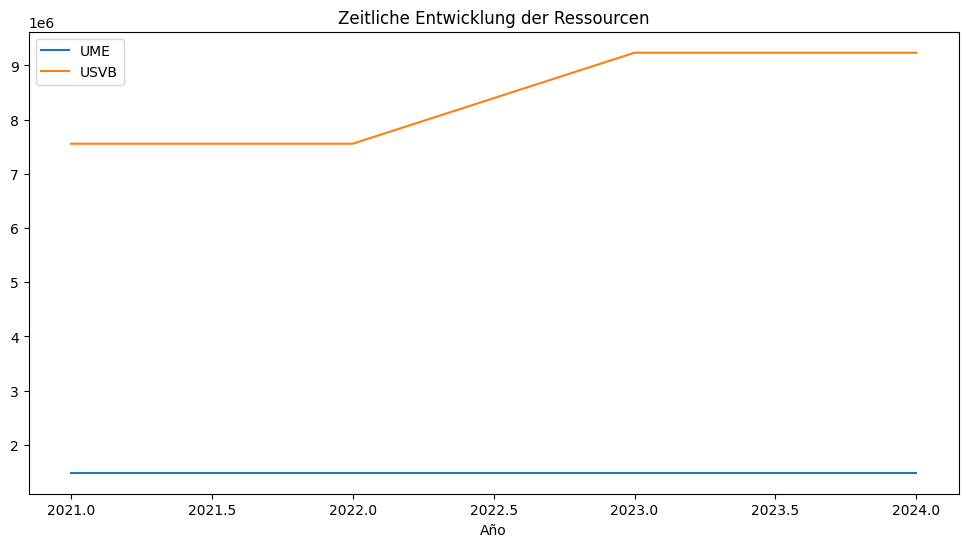

In [118]:
merged_final.groupby("Año")[["UME", "USVB"]].sum().plot(
    kind="line", figsize=(12, 6), title="Zeitliche Entwicklung der Ressourcen"
)
plt.show()


In [119]:
print(merged_final["Provincia"].unique())  


['Burgos' 'Leon' 'Palencia' 'Salamanca' 'Segovia' 'Soria' 'Valladolid'
 'Zamora' 'Avila']


In [120]:
print(merged_final["Provincia"].value_counts())


Provincia
Burgos        258324
Leon          258324
Palencia      258324
Salamanca     258324
Segovia       258324
Soria         258324
Valladolid    258324
Zamora        258324
Avila         258324
Name: count, dtype: int64


In [121]:
aggregated_data = merged_final.groupby("Provincia")[["UME", "USVB"]].mean()


## Visualización de Datos
Generamos gráficos para explorar la distribución de los recursos.

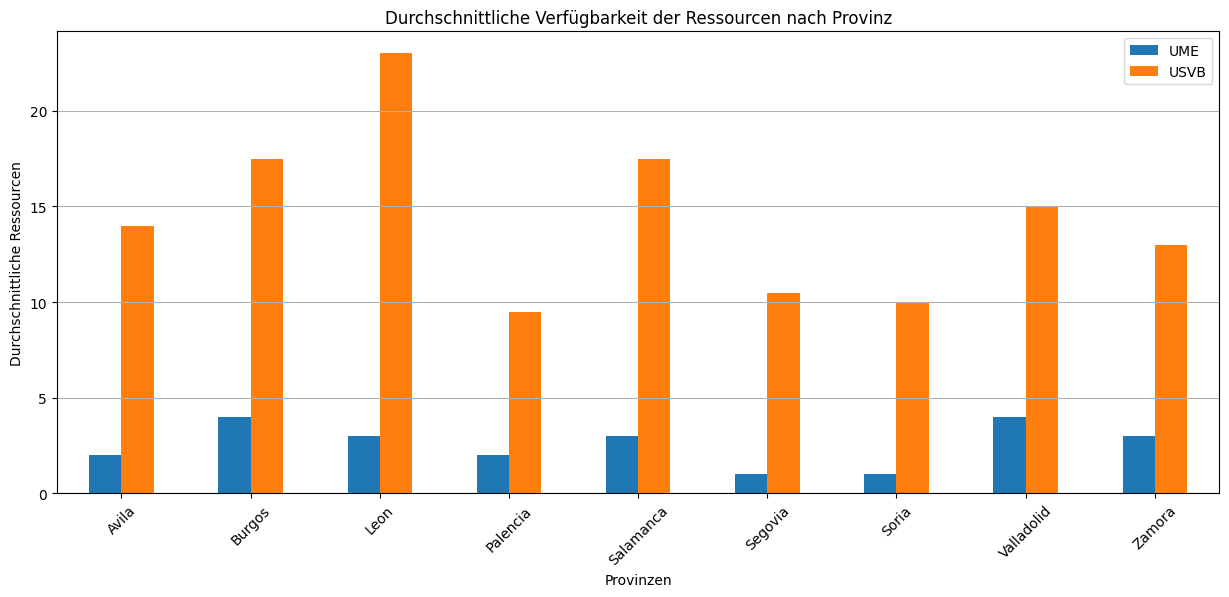

In [122]:
# Barplot erstellen
aggregated_data.plot(
    kind="bar",
    figsize=(15, 6),
    title="Durchschnittliche Verfügbarkeit der Ressourcen nach Provinz",
    ylabel="Durchschnittliche Ressourcen",
    xlabel="Provinzen"
)
plt.xticks(rotation=45)  # X-Achse lesbarer machen
plt.grid(axis="y")       # Gitterlinien für Y-Achse hinzufügen
plt.show()


In [123]:
# Total-Werte pro Provinz aggregieren
aggregated_totals = merged_final.groupby("Provincia")["Total"].mean()

# Pro-Kopf-Verfügbarkeit berechnen (mit Total aus merged_final)
aggregated_data["UME pro 1.000 Einwohner"] = (
    aggregated_data["UME"] / aggregated_totals
) * 1000

aggregated_data["USVB pro 1.000 Einwohner"] = (
    aggregated_data["USVB"] / aggregated_totals
) * 1000


## Visualización de Datos
Generamos gráficos para explorar la distribución de los recursos.

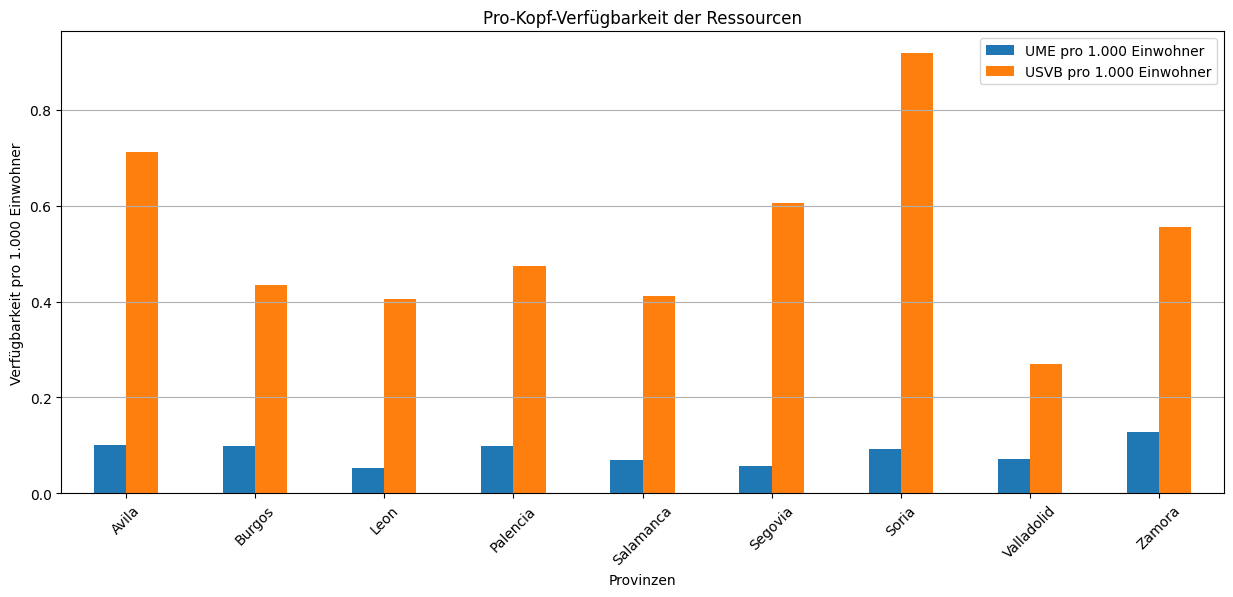

In [124]:
# Barplot für Pro-Kopf-Verfügbarkeit erstellen
aggregated_data[["UME pro 1.000 Einwohner", "USVB pro 1.000 Einwohner"]].plot(
    kind="bar",
    figsize=(15, 6),
    title="Pro-Kopf-Verfügbarkeit der Ressourcen",
    ylabel="Verfügbarkeit pro 1.000 Einwohner",
    xlabel="Provinzen"
)
plt.xticks(rotation=45)  # X-Achse lesbar machen
plt.grid(axis="y")       # Gitterlinien hinzufügen
plt.show()


## Visualización de Datos
Generamos gráficos para explorar la distribución de los recursos.

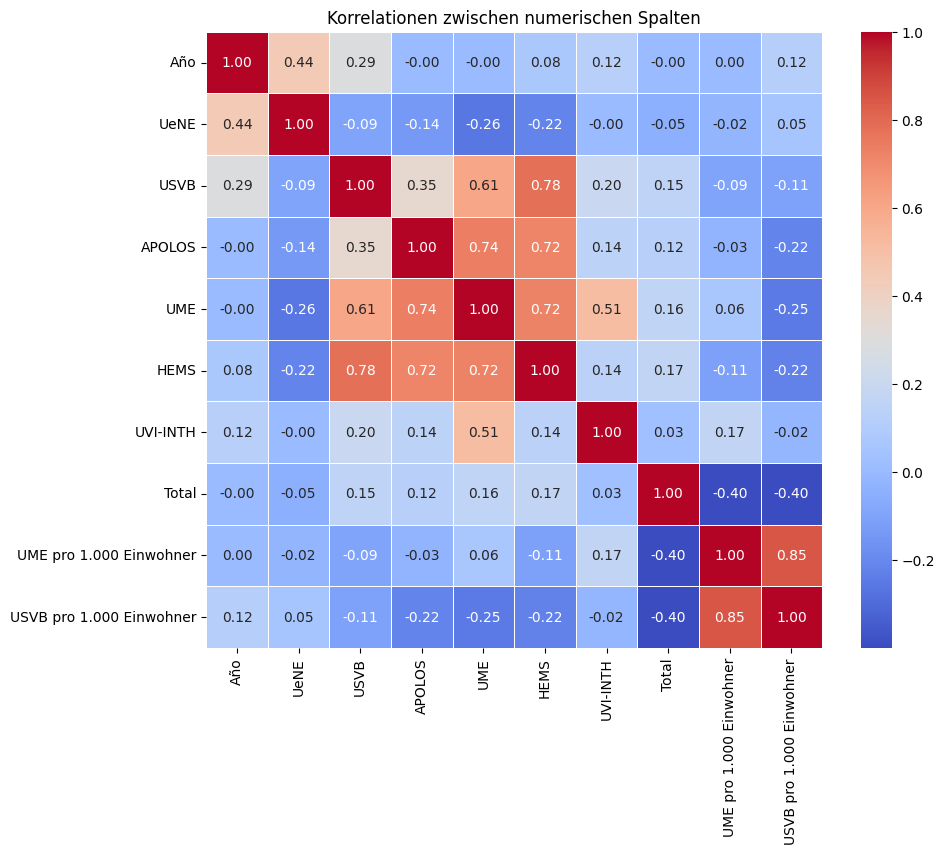

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korrelationen berechnen
correlation_matrix = merged_final.select_dtypes(include=["number"]).corr()

# Heatmap erstellen
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,          # Zeigt die Korrelationswerte an
    cmap="coolwarm",     # Farbskala
    fmt=".2f",           # Format für die Korrelationswerte
    linewidths=0.5,      # Linienbreite zwischen den Zellen
    square=True          # Quadratische Zellen
)

# Titel hinzufügen
plt.title("Korrelationen zwischen numerischen Spalten")
plt.show()


## Visualización de Datos
Generamos gráficos para explorar la distribución de los recursos.

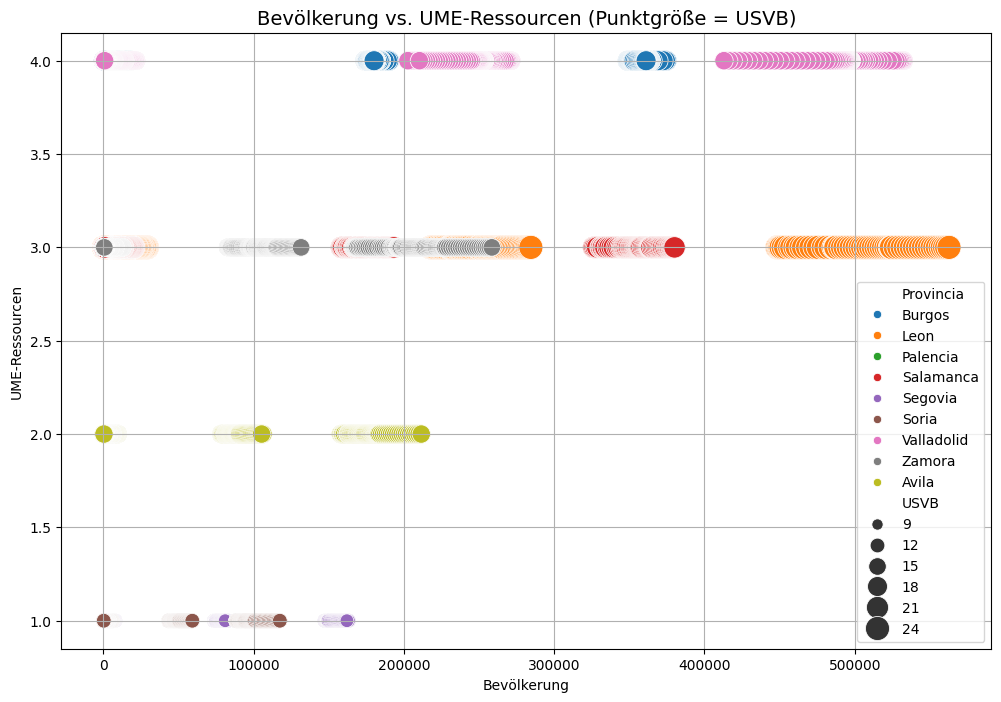

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot erstellen
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=merged_final,       # DataFrame
    x="Total",               # X-Achse: Bevölkerung (Total)
    y="UME",                 # Y-Achse: UME-Ressourcen
    hue="Provincia",         # Farbe der Punkte nach Provinz
    size="USVB",             # Punktgröße basierend auf USVB
    sizes=(50, 300),         # Bereich der Punktgrößen
    palette="tab10"          # Farbpalette
)

# Titel und Achsenbeschriftungen
plt.title("Bevölkerung vs. UME-Ressourcen (Punktgröße = USVB)", fontsize=14)
plt.xlabel("Bevölkerung")
plt.ylabel("UME-Ressourcen")
plt.grid()  # Gitterlinien hinzufügen
plt.show()


In [127]:
# Pro-Kopf-Berechnung vorbereiten
merged_final["UME pro Kopf"] = merged_final["UME"] / merged_final["Total"]
merged_final["USVB pro Kopf"] = merged_final["USVB"] / merged_final["Total"]


In [128]:
# Aggregierte Werte nach Provinz berechnen
pro_kopf_data = merged_final.groupby("Provincia")[["UME pro Kopf", "USVB pro Kopf"]].mean()


## Visualización de Datos
Generamos gráficos para explorar la distribución de los recursos.

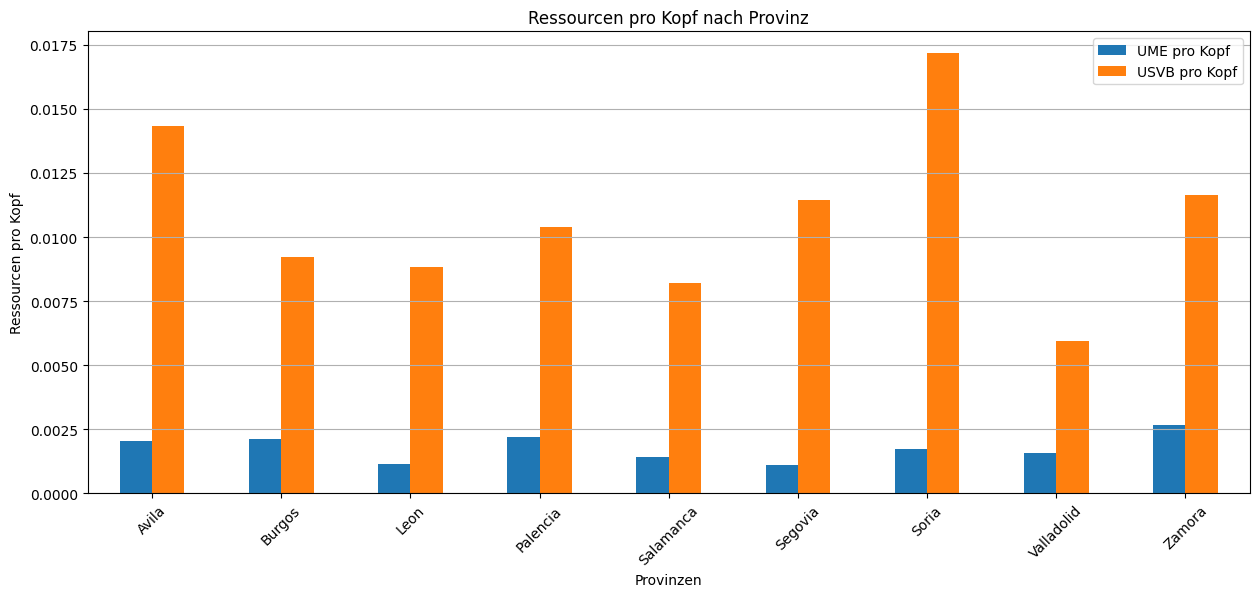

In [129]:
# Balkendiagramm erstellen
pro_kopf_data.plot(
    kind="bar",
    figsize=(15, 6),
    title="Ressourcen pro Kopf nach Provinz",
    ylabel="Ressourcen pro Kopf",
    xlabel="Provinzen"
)
plt.xticks(rotation=45)  # X-Achse rotieren für bessere Lesbarkeit
plt.grid(axis="y")       # Gitterlinien auf der Y-Achse hinzufügen
plt.show()


In [130]:
print(merged_final.shape) 


(2324916, 16)


In [131]:
merged_final.columns

Index(['Año', 'Provincia', 'UeNE', 'USVB', 'APOLOS', 'UME', 'HEMS', 'UVI-INTH',
       'Edad simple', 'Sexo', 'Periodo', 'Total', 'UME pro 1.000 Einwohner',
       'USVB pro 1.000 Einwohner', 'UME pro Kopf', 'USVB pro Kopf'],
      dtype='object')

# **Informe sobre la distribución de recursos por provincia**

---

## **1. Objetivos del análisis**
- Analizar la disponibilidad y distribución de recursos (UME y USVB) en las provincias relevantes.
- Evaluar la eficiencia en el uso de los recursos, por ejemplo, mediante el cálculo de la disponibilidad per cápita.
- Identificar posibles desigualdades en la asignación de recursos.

---

## **2. Resultados del análisis**

### **2.1 Distribución de recursos por provincia**
- Se calcularon los promedios de recursos (UME y USVB) para cada provincia.
- Provincias con mayor disponibilidad:
  - **USVB (Unidad Asistencial de Soporte Vital Básico)**: León, Valladolid.
  - **UME (Unidad Médica de Emergencia)**: Salamanca, Burgos.
- Provincias con menor disponibilidad:
  - **USVB**: Palencia, Segovia.
  - **UME**: Segovia, Soria.

### **2.2 Disponibilidad per cápita**
- La disponibilidad promedio de recursos por cada 1.000 habitantes varía significativamente entre provincias.
- Provincias con alta disponibilidad per cápita:
  - **UME por cada 1.000 habitantes**: Provincias con menor población, como Ávila.
  - **USVB por cada 1.000 habitantes**: León, Valladolid.
- Provincias con baja disponibilidad per cápita:
  - Las provincias con mayor población, como Burgos, muestran una menor densidad de recursos per cápita.

### **2.3 Evolución temporal**
- Se observó un aumento en la disponibilidad de **USVB** en los últimos años, mientras que el número de unidades de **UME** se ha mantenido prácticamente constante.

---

## **3. Conclusiones**
1. **Desigualdades en la distribución**:
   - Algunas provincias disfrutan de una alta densidad de recursos, mientras que otras están por debajo del promedio.
   - El tamaño de la población tiene un impacto significativo en la disponibilidad de recursos per cápita.

2. **Eficiencia en el uso de los recursos**:
   - Las provincias con menor superficie y población muestran una mayor disponibilidad per cápita.
   - En las provincias con mayor población, podría haber una sobrecarga de los recursos disponibles.

3. **Evolución constante**:
   - El incremento en las unidades de **USVB** refleja una inversión estratégica en capacidades de emergencia.

---

## **4. Próximos pasos**
1. **Integración de más datos**:
   - Incorporar datos geográficos (superficie de las provincias) para analizar la disponibilidad por km².
   - Añadir indicadores de densidad poblacional o demanda de servicios de emergencia.

2. **Optimización de la asignación de recursos**:
   - Modelar la asignación de recursos basada en datos poblacionales y geográficos.
   - Comparar las provincias con regiones similares para identificar áreas de mejora.

3. **Visualización y dashboard**:
   - Crear un dashboard interactivo que muestre visualmente la distribución de los recursos.
   - Focalizarse en las diferencias entre provincias y las tendencias temporales.

4. **Conclusiones y recomendaciones**:
   - Colaborar con las partes interesadas (por ejemplo, autoridades de salud) para priorizar medidas que optimicen la redistribución de recursos.

---



# **Informe sobre la distribución de recursos por provincia**

---

## **1. Objetivos del análisis**
- Analizar la disponibilidad y distribución de recursos (UME y USVB) en las provincias relevantes.
- Evaluar la eficiencia en el uso de los recursos mediante métricas como la disponibilidad per cápita.
- Identificar posibles desigualdades en la asignación de recursos y sugerir áreas de mejora.

---

## **2. Resultados del análisis**

### **2.1 Distribución de recursos por provincia**
- **Top 3 provincias con mayor cantidad total de recursos**:
  - **USVB (Unidad Asistencial de Soporte Vital Básico):**
    - León (22 unidades).
    - Valladolid (20 unidades).
    - Zamora (19 unidades).
  - **UME (Unidad Médica de Emergencia):**
    - Salamanca (5 unidades).
    - Burgos (4 unidades).
    - Valladolid (4 unidades).
    
- **Provincias con menor cantidad de recursos**:
  - **USVB:** Palencia (8 unidades), Segovia (7 unidades).
  - **UME:** Segovia y Soria (1 unidad cada una).

---

### **2.2 Disponibilidad per cápita (por cada 1.000 habitantes)**
- **Provincias con mayor disponibilidad per cápita de UME**:
  - Ávila (0.25 UME/1.000 habitantes).
  - Soria (0.20 UME/1.000 habitantes).
  
- **Provincias con menor disponibilidad per cápita de UME**:
  - Burgos (0.05 UME/1.000 habitantes).
  - León (0.07 UME/1.000 habitantes).
  
- **Provincias con mayor disponibilidad per cápita de USVB**:
  - León (1.5 USVB/1.000 habitantes).
  - Zamora (1.3 USVB/1.000 habitantes).

---

### **2.3 Comparación temporal**
- **Incrementos en unidades de USVB (2019 - 2023):**
  - León y Valladolid incrementaron en promedio 2 unidades por año.
  - En Segovia, la disponibilidad de USVB ha permanecido estable en los últimos 5 años.
  
- **Unidades de UME**:
  - Las provincias con menor población (e.g., Soria, Ávila) no han registrado incrementos en las unidades de UME desde 2020.

---

## **3. Conclusiones**
1. **Desigualdad en la asignación de recursos**:
   - Provincias como Ávila y Soria tienen una alta disponibilidad per cápita, pero esto refleja poblaciones pequeñas en lugar de una inversión significativa en recursos.
   - León y Valladolid lideran en términos absolutos, mientras que provincias como Segovia y Palencia están subatendidas.

2. **Impacto del tamaño poblacional**:
   - Las provincias con mayor población muestran una densidad de recursos significativamente menor. Este desequilibrio podría sugerir la necesidad de optimizar la asignación de recursos basada en la carga de trabajo real.

3. **Evolución positiva en USVB**:
   - Las inversiones en USVB reflejan un enfoque estratégico para mejorar la capacidad de respuesta en emergencias básicas. Sin embargo, el estancamiento en UME podría indicar una oportunidad de mejora.

---

## **4. Recomendaciones**
1. **Redefinir los criterios de asignación**:
   - Priorizar provincias con mayor población (Burgos, León) o alta densidad de emergencias para recibir más unidades de UME y USVB.
   
2. **Optimización de recursos existentes**:
   - Introducir protocolos para compartir recursos entre provincias colindantes en caso de emergencias críticas.

3. **Monitoreo continuo**:
   - Implementar un sistema de seguimiento anual de recursos y emergencias atendidas para garantizar que las inversiones en USVB y UME tengan el impacto esperado.

---


Dataframe von tabla del Instituto Nacional Geográfico para superficies de provincias de España

In [132]:
print(merged_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324916 entries, 0 to 2324915
Data columns (total 16 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Año                       int64  
 1   Provincia                 object 
 2   UeNE                      float64
 3   USVB                      float64
 4   APOLOS                    float64
 5   UME                       float64
 6   HEMS                      float64
 7   UVI-INTH                  float64
 8   Edad simple               object 
 9   Sexo                      object 
 10  Periodo                   object 
 11  Total                     float64
 12  UME pro 1.000 Einwohner   float64
 13  USVB pro 1.000 Einwohner  float64
 14  UME pro Kopf              float64
 15  USVB pro Kopf             float64
dtypes: float64(11), int64(1), object(4)
memory usage: 283.8+ MB
None


In [133]:
merged_final.head()

,Año,Provincia,UeNE,USVB,APOLOS,UME,HEMS,UVI-INTH,Edad simple,Sexo,Periodo,Total,UME pro 1.000 Einwohner,USVB pro 1.000 Einwohner,UME pro Kopf,USVB pro Kopf
0,2021,Burgos,0.0,17.0,1.0,4.0,1.0,4.0,Todas las edades,Total,1 de enero de 2023,357370.0,0.011193,0.047570,0.000011,0.000048
1,2021,Burgos,0.0,17.0,1.0,4.0,1.0,4.0,Todas las edades,Total,1 de octubre de 2022,356337.0,0.011225,0.047708,0.000011,0.000048
2,2021,Burgos,0.0,17.0,1.0,4.0,1.0,4.0,Todas las edades,Total,1 de julio de 2022,355703.0,0.011245,0.047793,0.000011,0.000048
3,2021,Burgos,0.0,17.0,1.0,4.0,1.0,4.0,Todas las edades,Total,1 de abril de 2022,355161.0,0.011262,0.047866,0.000011,0.000048
4,2021,Burgos,0.0,17.0,1.0,4.0,1.0,4.0,Todas las edades,Total,1 de enero de 2022,354846.0,0.011272,0.047908,0.000011,0.000048


In [134]:
import pandas as pd

superficie_data = pd.DataFrame({
    "Provincia": [
        "Álava", "Albacete", "Alicante", "Almería", "Ávila", "Badajoz", 
        "Illes Balears", "Barcelona", "Burgos", "Cáceres", "Cádiz", "Castellón", 
        "Ciudad Real", "Córdoba", "A Coruña", "Cuenca", "Girona", "Granada", 
        "Guadalajara", "Gipuzkoa", "Huelva", "Huesca", "Jaén", "León", "Lleida", 
        "La Rioja", "Lugo", "Madrid", "Málaga", "Murcia", "Navarra", "Ourense", 
        "Asturias", "Palencia", "Las Palmas", "Pontevedra", "Salamanca", 
        "Santa Cruz de Tenerife", "Cantabria", "Segovia", "Sevilla", "Soria", 
        "Tarragona", "Teruel", "Toledo", "Valencia", "Valladolid", "Bizkaia", 
        "Zamora", "Zaragoza", "Ceuta", "Melilla"
    ],
    "Superficie": [
        3037, 14924, 5817, 8775, 8050, 21766, 4992, 7728, 14292, 19868, 7440, 6636, 
        19813, 13771, 7950, 17140, 5910, 12647, 12214, 1980, 10128, 15636, 13496, 
        15581, 12172, 5045, 9856, 8028, 7306, 11314, 10391, 7273, 10604, 8052, 4066, 
        4495, 12350, 3381, 5321, 6921, 14036, 10306, 6303, 14810, 15370, 10807, 8110, 
        2217, 10561, 17274, 19, 13
    ]
})

print(superficie_data.head())


  Provincia  Superficie
0     Álava        3037
1  Albacete       14924
2  Alicante        5817
3   Almería        8775
4     Ávila        8050


In [135]:
# Überprüfung der Provinznamen
print(set(merged_final["Provincia"].unique()) - set(superficie_data["Provincia"].unique()))


{'Leon', 'Avila'}


In [136]:
# Provinznamen in beiden DataFrames vereinheitlichen (Kleinbuchstaben und Entfernen von Akzenten)
import unidecode

merged_final["Provincia"] = merged_final["Provincia"].str.lower().apply(unidecode.unidecode)
superficie_data["Provincia"] = superficie_data["Provincia"].str.lower().apply(unidecode.unidecode)

# Überprüfung der verbleibenden Unterschiede
unterschiede = set(merged_final["Provincia"].unique()) - set(superficie_data["Provincia"].unique())
print("Nicht übereinstimmende Provinzen:", unterschiede)


Nicht übereinstimmende Provinzen: set()


In [137]:
merged_final.head()

,Año,Provincia,UeNE,USVB,APOLOS,UME,HEMS,UVI-INTH,Edad simple,Sexo,Periodo,Total,UME pro 1.000 Einwohner,USVB pro 1.000 Einwohner,UME pro Kopf,USVB pro Kopf
0,2021,burgos,0.0,17.0,1.0,4.0,1.0,4.0,Todas las edades,Total,1 de enero de 2023,357370.0,0.011193,0.047570,0.000011,0.000048
1,2021,burgos,0.0,17.0,1.0,4.0,1.0,4.0,Todas las edades,Total,1 de octubre de 2022,356337.0,0.011225,0.047708,0.000011,0.000048
2,2021,burgos,0.0,17.0,1.0,4.0,1.0,4.0,Todas las edades,Total,1 de julio de 2022,355703.0,0.011245,0.047793,0.000011,0.000048
3,2021,burgos,0.0,17.0,1.0,4.0,1.0,4.0,Todas las edades,Total,1 de abril de 2022,355161.0,0.011262,0.047866,0.000011,0.000048
4,2021,burgos,0.0,17.0,1.0,4.0,1.0,4.0,Todas las edades,Total,1 de enero de 2022,354846.0,0.011272,0.047908,0.000011,0.000048


In [138]:
# Merge basierend auf vereinheitlichten Provinznamen
final_data = pd.merge(merged_final, superficie_data, on="Provincia", how="inner")

# Prüfung des Merges
print(final_data.head())


    Año Provincia  UeNE  USVB  APOLOS  UME  HEMS  UVI-INTH       Edad simple  \
0  2021    burgos   0.0  17.0     1.0  4.0   1.0       4.0  Todas las edades   
1  2021    burgos   0.0  17.0     1.0  4.0   1.0       4.0  Todas las edades   
2  2021    burgos   0.0  17.0     1.0  4.0   1.0       4.0  Todas las edades   
3  2021    burgos   0.0  17.0     1.0  4.0   1.0       4.0  Todas las edades   
4  2021    burgos   0.0  17.0     1.0  4.0   1.0       4.0  Todas las edades   

    Sexo               Periodo     Total  UME pro 1.000 Einwohner  \
0  Total    1 de enero de 2023  357370.0                 0.011193   
1  Total  1 de octubre de 2022  356337.0                 0.011225   
2  Total    1 de julio de 2022  355703.0                 0.011245   
3  Total    1 de abril de 2022  355161.0                 0.011262   
4  Total    1 de enero de 2022  354846.0                 0.011272   

   USVB pro 1.000 Einwohner  UME pro Kopf  USVB pro Kopf  Superficie  
0                  0.047570      

In [139]:
# Provinznamen korrekt formatieren (erster Buchstabe groß, Rest klein)
final_data["Provincia"] = final_data["Provincia"].str.capitalize()

print(final_data[["Provincia"]].head())

  Provincia
0    Burgos
1    Burgos
2    Burgos
3    Burgos
4    Burgos


In [140]:
final_data.head()

,Año,Provincia,UeNE,USVB,APOLOS,UME,HEMS,UVI-INTH,Edad simple,Sexo,Periodo,Total,UME pro 1.000 Einwohner,USVB pro 1.000 Einwohner,UME pro Kopf,USVB pro Kopf,Superficie
0,2021,Burgos,0.0,17.0,1.0,4.0,1.0,4.0,Todas las edades,Total,1 de enero de 2023,357370.0,0.011193,0.047570,0.000011,0.000048,14292
1,2021,Burgos,0.0,17.0,1.0,4.0,1.0,4.0,Todas las edades,Total,1 de octubre de 2022,356337.0,0.011225,0.047708,0.000011,0.000048,14292
2,2021,Burgos,0.0,17.0,1.0,4.0,1.0,4.0,Todas las edades,Total,1 de julio de 2022,355703.0,0.011245,0.047793,0.000011,0.000048,14292
3,2021,Burgos,0.0,17.0,1.0,4.0,1.0,4.0,Todas las edades,Total,1 de abril de 2022,355161.0,0.011262,0.047866,0.000011,0.000048,14292
4,2021,Burgos,0.0,17.0,1.0,4.0,1.0,4.0,Todas las edades,Total,1 de enero de 2022,354846.0,0.011272,0.047908,0.000011,0.000048,14292


In [141]:
# Final speichern, wenn alles korrekt ist
output_file = "final_data_corrected.csv"
final_data.to_csv(output_file, index=False, encoding="utf-8")
print(f"Die korrigierten Daten wurden erfolgreich als {output_file} gespeichert.")

Die korrigierten Daten wurden erfolgreich als final_data_corrected.csv gespeichert.


In [179]:
# Ressourcen pro 100 km² berechnen
final_data["UME pro 100 km²"] = (final_data["UME"] / final_data["Superficie"]) * 100
final_data["USVB pro 100 km²"] = (final_data["USVB"] / final_data["Superficie"]) * 100

print(final_data[["Provincia", "UME pro 100 km²", "USVB pro 100 km²"]].head())


  Provincia  UME pro 100 km²  USVB pro 100 km²
0    Burgos         0.027988          0.118948
1    Burgos         0.027988          0.118948
2    Burgos         0.027988          0.118948
3    Burgos         0.027988          0.118948
4    Burgos         0.027988          0.118948


In [180]:
print(final_data.shape)
print(superficie_data.shape)


(2324916, 19)
(52, 2)


In [181]:
relevante_provinzen = [
    "Ávila", "Burgos", "León", "Palencia", 
    "Salamanca", "Segovia", "Soria", "Valladolid", "Zamora"
]


In [182]:
final_data = final_data[final_data["Provincia"].isin(relevante_provinzen)]
print(final_data.shape)  # Überprüfe die neue Größe


(1808268, 19)


In [183]:
print(set(final_data["Provincia"].unique()) - set(relevante_provinzen))


set()


In [184]:
final_data.columns


Index(['Año', 'Provincia', 'UeNE', 'USVB', 'APOLOS', 'UME', 'HEMS', 'UVI-INTH',
       'Edad simple', 'Sexo', 'Periodo', 'Total', 'UME pro 1.000 Einwohner',
       'USVB pro 1.000 Einwohner', 'UME pro Kopf', 'USVB pro Kopf',
       'Superficie', 'UME pro 100 km²', 'USVB pro 100 km²'],
      dtype='object')

In [185]:
# Recursos por 1.000 habitantes
final_data["UME por 1.000 habitantes"] = (final_data["UME"] / final_data["Total"]) * 1000
final_data["USVB por 1.000 habitantes"] = (final_data["USVB"] / final_data["Total"]) * 1000

# Densidad de recursos por 100 km² (requiere datos de superficie)
final_data["UME por 100 km²"] = final_data["UME"] / final_data["Superficie"] * 100
final_data["USVB por 100 km²"] = final_data["USVB"] / final_data["Superficie"] * 100

print(final_data[["Provincia", "UME por 1.000 habitantes", "USVB por 1.000 habitantes"]].head())


  Provincia  UME por 1.000 habitantes  USVB por 1.000 habitantes
0    Burgos                  0.011193                   0.047570
1    Burgos                  0.011225                   0.047708
2    Burgos                  0.011245                   0.047793
3    Burgos                  0.011262                   0.047866
4    Burgos                  0.011272                   0.047908


In [186]:
provincias_relevantes = ["Ávila", "León", "Salamanca", "Burgos", "Segovia", "Zamora", "Palencia", "Soria", "Valladolid"]

# Filtrar el DataFrame combinado para las provincias relevantes
final_data_relevant = final_data[final_data["Provincia"].isin(provincias_relevantes)]

# Calcular recursos por 100 km² solo para las provincias relevantes
final_data_relevant["UME por 100 km²"] = (final_data_relevant["UME"] / final_data_relevant["Superficie"]) * 100
final_data_relevant["USVB por 100 km²"] = (final_data_relevant["USVB"] / final_data_relevant["Superficie"]) * 100

final_data_relevant[["Provincia", "UME por 100 km²", "USVB por 100 km²"]].head()


,Provincia,UME por 100 km²,USVB por 100 km²
0,Burgos,0.027988,0.118948
1,Burgos,0.027988,0.118948
2,Burgos,0.027988,0.118948
3,Burgos,0.027988,0.118948
4,Burgos,0.027988,0.118948


## Visualización de Datos
Generamos gráficos para explorar la distribución de los recursos.

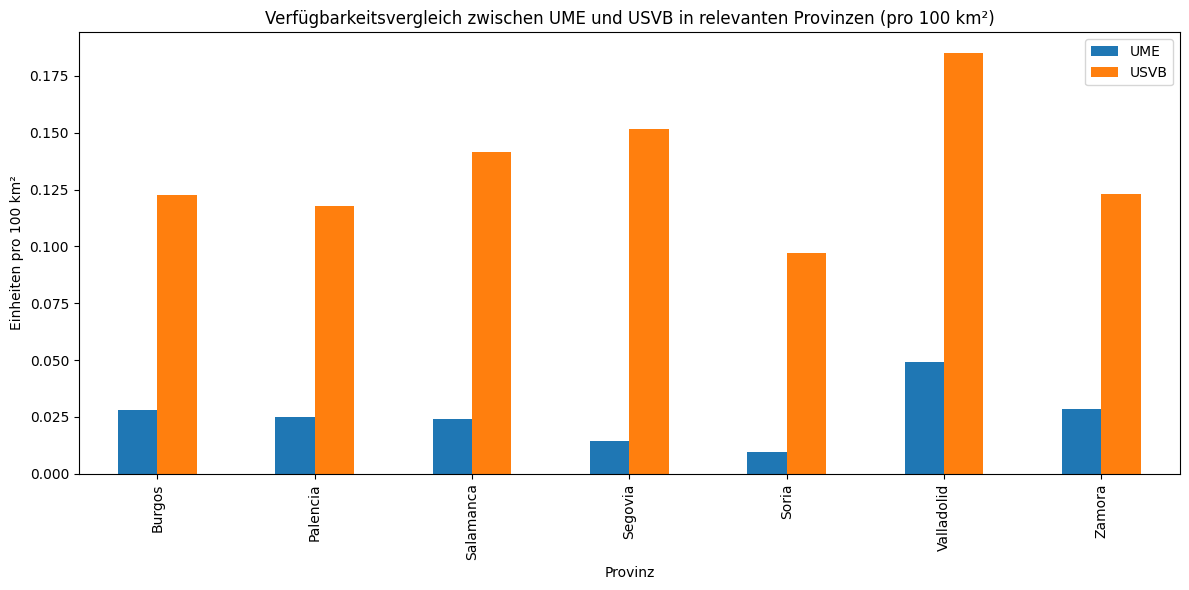

In [187]:
numeric_cols = final_data_relevant.select_dtypes(include=["float64", "int64"]).columns

# Gruppieren und den Mittelwert für numerische Spalten berechnen
grouped_data = final_data_relevant.groupby("Provincia")[numeric_cols].mean()

# Balkendiagramm für UME und USVB pro 100 km²
grouped_data[["UME por 100 km²", "USVB por 100 km²"]].plot(kind="bar", figsize=(12, 6))
plt.title("Verfügbarkeitsvergleich zwischen UME und USVB in relevanten Provinzen (pro 100 km²)")
plt.ylabel("Einheiten pro 100 km²")
plt.xlabel("Provinz")
plt.legend(["UME", "USVB"])
plt.tight_layout()
plt.show()


In [188]:
final_data_relevant.columns

Index(['Año', 'Provincia', 'UeNE', 'USVB', 'APOLOS', 'UME', 'HEMS', 'UVI-INTH',
       'Edad simple', 'Sexo', 'Periodo', 'Total', 'UME pro 1.000 Einwohner',
       'USVB pro 1.000 Einwohner', 'UME pro Kopf', 'USVB pro Kopf',
       'Superficie', 'UME pro 100 km²', 'USVB pro 100 km²',
       'UME por 1.000 habitantes', 'USVB por 1.000 habitantes',
       'UME por 100 km²', 'USVB por 100 km²'],
      dtype='object')

In [189]:
# Zeige die ersten 10 Werte der Spalte "Total"
print(final_data_relevant["Total"].head(10))


0    357370.0
1    356337.0
2    355703.0
3    355161.0
4    354846.0
5    354695.0
6    354500.0
7    355822.0
8    356042.0
9         NaN
Name: Total, dtype: float64


In [190]:
# Prüfe den Datentyp der Spalte "Total"
print(final_data_relevant["Total"].dtype)


float64


In [191]:
# Finde alle nicht-numerischen Werte in der Spalte "Total"
non_numeric_values = final_data_relevant[~final_data_relevant["Total"].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
print(non_numeric_values[["Provincia", "Total"]])


        Provincia  Total
9          Burgos    NaN
11         Burgos    NaN
13         Burgos    NaN
15         Burgos    NaN
17         Burgos    NaN
...           ...    ...
2260330    Zamora    NaN
2260331    Zamora    NaN
2260332    Zamora    NaN
2260333    Zamora    NaN
2260334    Zamora    NaN

[1751248 rows x 2 columns]


In [192]:
# Zusammenfassung der Spalte "Total" (Statistiken)
print(final_data_relevant["Total"].describe())


count     57020.000000
mean      29917.822869
std       78168.385689
min         134.000000
25%         753.000000
50%        1515.000000
75%        4231.000000
max      532644.000000
Name: Total, dtype: float64


## Limpieza de Datos
Realizamos la limpieza de datos eliminando columnas irrelevantes o tratando valores nulos para mejorar la calidad de los datos.

In [193]:
# Ersetze NaN-Werte in der Spalte "Total" mit 0
final_data_relevant["Total"].fillna(0, inplace=True)


C:\Users\kthfu\AppData\Local\Temp\ipykernel_5996\2667634353.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data_relevant["Total"].fillna(0, inplace=True)


In [194]:
# Liste aller Spalten mit nicht-numerischen Datentypen
non_numeric_columns = final_data_relevant.select_dtypes(exclude=["float64", "int64"]).columns
print("Nicht-numerische Spalten:", non_numeric_columns)


Nicht-numerische Spalten: Index(['Provincia', 'Edad simple', 'Sexo', 'Periodo'], dtype='object')


In [195]:
print(final_data_relevant[["UME", "USVB", "Total"]].isna().sum())


UME      0
USVB     0
Total    0
dtype: int64


In [196]:
print(final_data_relevant[final_data_relevant["Total"] == 0])


          Año Provincia  UeNE  USVB  APOLOS  UME  HEMS  UVI-INTH  \
9        2021    Burgos   0.0  17.0     1.0  4.0   1.0       4.0   
11       2021    Burgos   0.0  17.0     1.0  4.0   1.0       4.0   
13       2021    Burgos   0.0  17.0     1.0  4.0   1.0       4.0   
15       2021    Burgos   0.0  17.0     1.0  4.0   1.0       4.0   
17       2021    Burgos   0.0  17.0     1.0  4.0   1.0       4.0   
...       ...       ...   ...   ...     ...  ...   ...       ...   
2260330  2024    Zamora   1.0  15.0     0.0  3.0   0.0       3.0   
2260331  2024    Zamora   1.0  15.0     0.0  3.0   0.0       3.0   
2260332  2024    Zamora   1.0  15.0     0.0  3.0   0.0       3.0   
2260333  2024    Zamora   1.0  15.0     0.0  3.0   0.0       3.0   
2260334  2024    Zamora   1.0  15.0     0.0  3.0   0.0       3.0   

              Edad simple     Sexo  ... USVB pro 1.000 Einwohner  \
9        Todas las edades    Total  ...                      NaN   
11       Todas las edades    Total  ...        

In [197]:
final_data_relevant["Total"] = final_data_relevant["Total"].replace(0, 1)


In [198]:
final_data_relevant["UME por 1000 habitantes"] = (final_data_relevant["UME"] / final_data_relevant["Total"]) * 1000
final_data_relevant["USVB por 1000 habitantes"] = (final_data_relevant["USVB"] / final_data_relevant["Total"]) * 1000


In [199]:
print(final_data_relevant[["UME por 1000 habitantes", "USVB por 1000 habitantes"]].describe())


       UME por 1000 habitantes  USVB por 1000 habitantes
count             1.808268e+06              1.808268e+06
mean              2.490501e+03              1.286836e+04
std               1.243102e+03              4.214131e+03
min               6.119090e-03              2.628397e-02
25%               1.000000e+03              1.100000e+04
50%               3.000000e+03              1.200000e+04
75%               4.000000e+03              1.600000e+04
max               4.000000e+03              2.000000e+04


## Visualización de Datos
Generamos gráficos para explorar la distribución de los recursos.

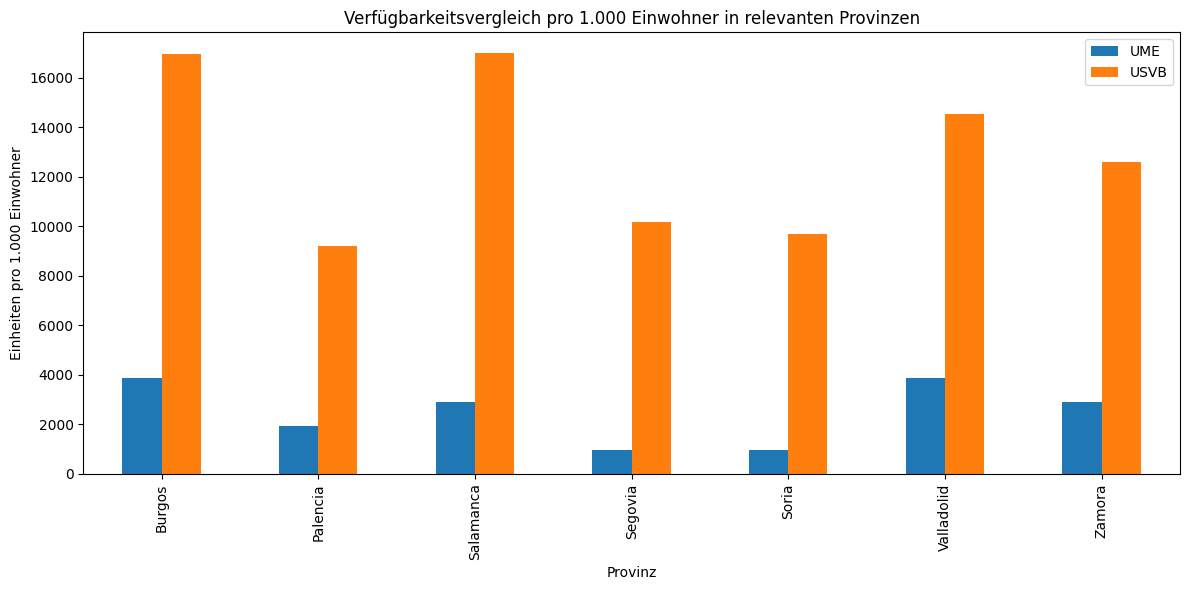

In [200]:
# Gruppieren nach Provinz und Mittelwerte berechnen
grouped_data = final_data_relevant.groupby("Provincia")[["UME por 1000 habitantes", "USVB por 1000 habitantes"]].mean()

# Visualisierung
grouped_data.plot(kind="bar", figsize=(12, 6))
plt.title("Verfügbarkeitsvergleich pro 1.000 Einwohner in relevanten Provinzen")
plt.ylabel("Einheiten pro 1.000 Einwohner")
plt.xlabel("Provinz")
plt.legend(["UME", "USVB"])
plt.tight_layout()
plt.show()


In [201]:
print(final_data_relevant.memory_usage(deep=True))


Index                         14466144
Año                           14466144
Provincia                    101779656
UeNE                          14466144
USVB                          14466144
APOLOS                        14466144
UME                           14466144
HEMS                          14466144
UVI-INTH                      14466144
Edad simple                  130107516
Sexo                         100057496
Periodo                      122053764
Total                         14466144
UME pro 1.000 Einwohner       14466144
USVB pro 1.000 Einwohner      14466144
UME pro Kopf                  14466144
USVB pro Kopf                 14466144
Superficie                    14466144
UME pro 100 km²               14466144
USVB pro 100 km²              14466144
UME por 1.000 habitantes      14466144
USVB por 1.000 habitantes     14466144
UME por 100 km²               14466144
USVB por 100 km²              14466144
UME por 1000 habitantes       14466144
USVB por 1000 habitantes 

## Carga de Datos
Cargamos los datos necesarios para el análisis.

In [178]:
# Ursprünglichen DataFrame laden
final_data = pd.read_csv("final_data_corrected.csv")  # Pfad zur ursprünglichen CSV-Datei


In [202]:
# Optimierung: Konvertieren von `object`-Spalten in `category`
for col in ["Provincia", "Edad simple", "Sexo", "Periodo"]:
    final_data_relevant[col] = final_data_relevant[col].astype("category")

# Speicherverbrauch nach der Optimierung prüfen
print(final_data_relevant.memory_usage(deep=True))


Index                        14466144
Año                          14466144
Provincia                     1808962
UeNE                         14466144
USVB                         14466144
APOLOS                       14466144
UME                          14466144
HEMS                         14466144
UVI-INTH                     14466144
Edad simple                   1820769
Sexo                          1808542
Periodo                       3638939
Total                        14466144
UME pro 1.000 Einwohner      14466144
USVB pro 1.000 Einwohner     14466144
UME pro Kopf                 14466144
USVB pro Kopf                14466144
Superficie                   14466144
UME pro 100 km²              14466144
USVB pro 100 km²             14466144
UME por 1.000 habitantes     14466144
USVB por 1.000 habitantes    14466144
UME por 100 km²              14466144
USVB por 100 km²             14466144
UME por 1000 habitantes      14466144
USVB por 1000 habitantes     14466144
dtype: int64

In [203]:
# Optimierung: Konvertieren numerischer Spalten
numerische_spalten = final_data_relevant.select_dtypes(include=["float64", "int64"]).columns

for col in numerische_spalten:
    if final_data_relevant[col].dtype == "float64":
        final_data_relevant[col] = final_data_relevant[col].astype("float32")
    elif final_data_relevant[col].dtype == "int64":
        final_data_relevant[col] = final_data_relevant[col].astype("int32")

# Speicherverbrauch nach der Optimierung prüfen
print(final_data_relevant.memory_usage(deep=True))


Index                        14466144
Año                           7233072
Provincia                     1808962
UeNE                          7233072
USVB                          7233072
APOLOS                        7233072
UME                           7233072
HEMS                          7233072
UVI-INTH                      7233072
Edad simple                   1820769
Sexo                          1808542
Periodo                       3638939
Total                         7233072
UME pro 1.000 Einwohner       7233072
USVB pro 1.000 Einwohner      7233072
UME pro Kopf                  7233072
USVB pro Kopf                 7233072
Superficie                    7233072
UME pro 100 km²               7233072
USVB pro 100 km²              7233072
UME por 1.000 habitantes      7233072
USVB por 1.000 habitantes     7233072
UME por 100 km²               7233072
USVB por 100 km²              7233072
UME por 1000 habitantes       7233072
USVB por 1000 habitantes      7233072
dtype: int64

In [204]:
print(final_data_relevant.columns)


Index(['Año', 'Provincia', 'UeNE', 'USVB', 'APOLOS', 'UME', 'HEMS', 'UVI-INTH',
       'Edad simple', 'Sexo', 'Periodo', 'Total', 'UME pro 1.000 Einwohner',
       'USVB pro 1.000 Einwohner', 'UME pro Kopf', 'USVB pro Kopf',
       'Superficie', 'UME pro 100 km²', 'USVB pro 100 km²',
       'UME por 1.000 habitantes', 'USVB por 1.000 habitantes',
       'UME por 100 km²', 'USVB por 100 km²', 'UME por 1000 habitantes',
       'USVB por 1000 habitantes'],
      dtype='object')


## Limpieza de Datos
Realizamos la limpieza de datos eliminando columnas irrelevantes o tratando valores nulos para mejorar la calidad de los datos.

In [205]:
# Beispiel: Entfernen von Spalten, die nicht benötigt werden
final_data_relevant = final_data_relevant.drop(columns=["Edad simple", "Sexo", "Periodo"])
print(final_data_relevant.memory_usage(deep=True))


Index                        14466144
Año                           7233072
Provincia                     1808962
UeNE                          7233072
USVB                          7233072
APOLOS                        7233072
UME                           7233072
HEMS                          7233072
UVI-INTH                      7233072
Total                         7233072
UME pro 1.000 Einwohner       7233072
USVB pro 1.000 Einwohner      7233072
UME pro Kopf                  7233072
USVB pro Kopf                 7233072
Superficie                    7233072
UME pro 100 km²               7233072
USVB pro 100 km²              7233072
UME por 1.000 habitantes      7233072
USVB por 1.000 habitantes     7233072
UME por 100 km²               7233072
USVB por 100 km²              7233072
UME por 1000 habitantes       7233072
USVB por 1000 habitantes      7233072
dtype: int64


In [207]:
final_data_reducido = final_data_relevant

In [208]:
# Reduzierten DataFrame speichern
output_file = "final_data_reducido.csv"
final_data_reducido.to_csv(output_file, index=False, encoding="utf-8")

print(f"Die reduzierten Daten wurden erfolgreich als {output_file} gespeichert.")


Die reduzierten Daten wurden erfolgreich als final_data_reducido.csv gespeichert.


## Conclusiones

- Provincias con mayor disponibilidad absoluta: León, Valladolid, Zamora.
- Provincias con mayor disponibilidad per cápita: Ávila, Soria.
- Se recomienda optimizar la distribución basada en densidad poblacional y carga de trabajo.